# Aprendizaje Autamático I - Gravi Fiorino - Gauto

## Librerías

In [ ]:
!pip install -q imblearn

In [70]:
#Instalamos optuna
!pip install -q optuna

^C


In [ ]:
!pip --quiet install shap

In [ ]:
!pip install -q tensorflow

In [71]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.ensemble import RandomForestRegressor
import optuna
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


## Apertura archivo 

In [72]:
archivo = pd.read_csv("weatherAUS.csv")
archivo.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## EDA

In [73]:
archivo.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

In [74]:
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0



* Código para eliminar la columna 'Unnamed: 0' del DataFrame 'archivo'
* axis="columns" especifica que la eliminación se debe realizar a nivel de columnas

In [75]:
archivo = archivo.drop("Unnamed: 0", axis = "columns")

2. Creación de una Lista de Ciudades de Interés
* Definición: Creamos una lista llamada ciudadesDeInteres que contiene nombres de ciudades.
* Contenido de la Lista: La lista incluye ciudades de interés en Australia. Luego,
filtramos el dataframe por estas ciudades de interés y comprobamos que solo se encuentras estas en el nuevo df


In [76]:
ciudadesDeInteres = ["Adelaide","Canberra","Cobar", "Dartmoor","Melbourne","MelbourneAirport", "MountGambier", "Sydney", "SydneyAirpor"]

In [77]:
df = archivo[archivo['Location'].isin(ciudadesDeInteres)]

In [78]:
df["Location"].unique()


array(['Cobar', 'Sydney', 'Canberra', 'MelbourneAirport', 'Melbourne',
       'Dartmoor', 'Adelaide', 'MountGambier'], dtype=object)

### Proceso para Añadir una Columna de Estaciones y Ordenar el DataFrame por Fecha

#### 1. **Conversión de Fechas**

1. **Conversión**: Utilizamos la función `to_datetime` de Pandas para convertir la columna `Date` del DataFrame `df` a un tipo de dato de fecha.

#### 2. **Función para Determinar la Estación del Año**

1. **Definición de Función**: Definimos una función `get_season` que toma un mes y retorna la estación correspondiente.
2. **Verano**: Diciembre, Enero, Febrero.
3. **Otoño**: Marzo, Abril, Mayo.
4. **Invierno**: Junio, Julio, Agosto.
5. **Primavera**: Septiembre, Octubre, Noviembre.

#### 3. **Añadir Columna de Estaciones**

1. **Mapeo de Estaciones**: Utilizamos la función `map` junto con `get_season` para crear una nueva columna `Season` en el DataFrame `df`, mapeando los meses de la columna `Date` a sus respectivas estaciones.

#### 4. **Ordenar el DataFrame por Fecha**

1. **Ordenación**: Utilizamos el método `sort_values` para ordenar el DataFrame `df` por la columna `Date`.

---

<span style="color:blue">**Nota**:</span> Este proceso convierte las fechas en el DataFrame a tipo datetime, añade una columna que indica la estación del año correspondiente a cada fecha, y ordena el DataFrame por la columna de fecha.


In [79]:
df['Date'] = pd.to_datetime(df['Date'])

def get_season(month):
    if month in [12, 1, 2]:  # Diciembre, Enero, Febrero -> Verano
        return 'Verano'
    elif month in [3, 4, 5]:  # Marzo, Abril, Mayo -> Otoño
        return 'Otoño'
    elif month in [6, 7, 8]:  # Junio, Julio, Agosto -> Invierno
        return 'Invierno'
    else:  # Septiembre, Octubre, Noviembre -> Primavera
        return 'Primavera'
df['Season'] = df['Date'].dt.month.map(get_season)

C:\Users\mateo\AppData\Local\Temp\ipykernel_2336\426852557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\mateo\AppData\Local\Temp\ipykernel_2336\426852557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].dt.month.map(get_season)


In [80]:
df = df.sort_values(by = 'Date')
#df

## Matríz de Correlación

### Generación y Visualización de la Matriz de Correlación

#### 1. Eliminación de Columnas No Numéricas

- **Selección de Columnas**: Eliminamos las columnas no numéricas del DataFrame `df`.
  - Columnas Eliminadas: 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season', 'RainToday', 'RainTomorrow'.

#### 2. Visualización de la Matriz de Correlación

- **Tamaño de la Figura**: Configuramos el tamaño de la figura para la visualización.
- **Generación del Mapa de Calor**: Utilizamos `sns.heatmap` para visualizar la matriz de correlación.
  - Parámetros: `annot=True` para mostrar los valores en cada celda, `cmap='coolwarm'` para el esquema de color.
- **Título**: Agregamos un título a la visualización.


<span style="color:blue">**Nota**:</span> Este proceso elimina las columnas no numéricas del DataFrame y genera un mapa de calor para visualizar la matriz de correlación entre las variables restantes utilizando el método de correlación de Spearman.


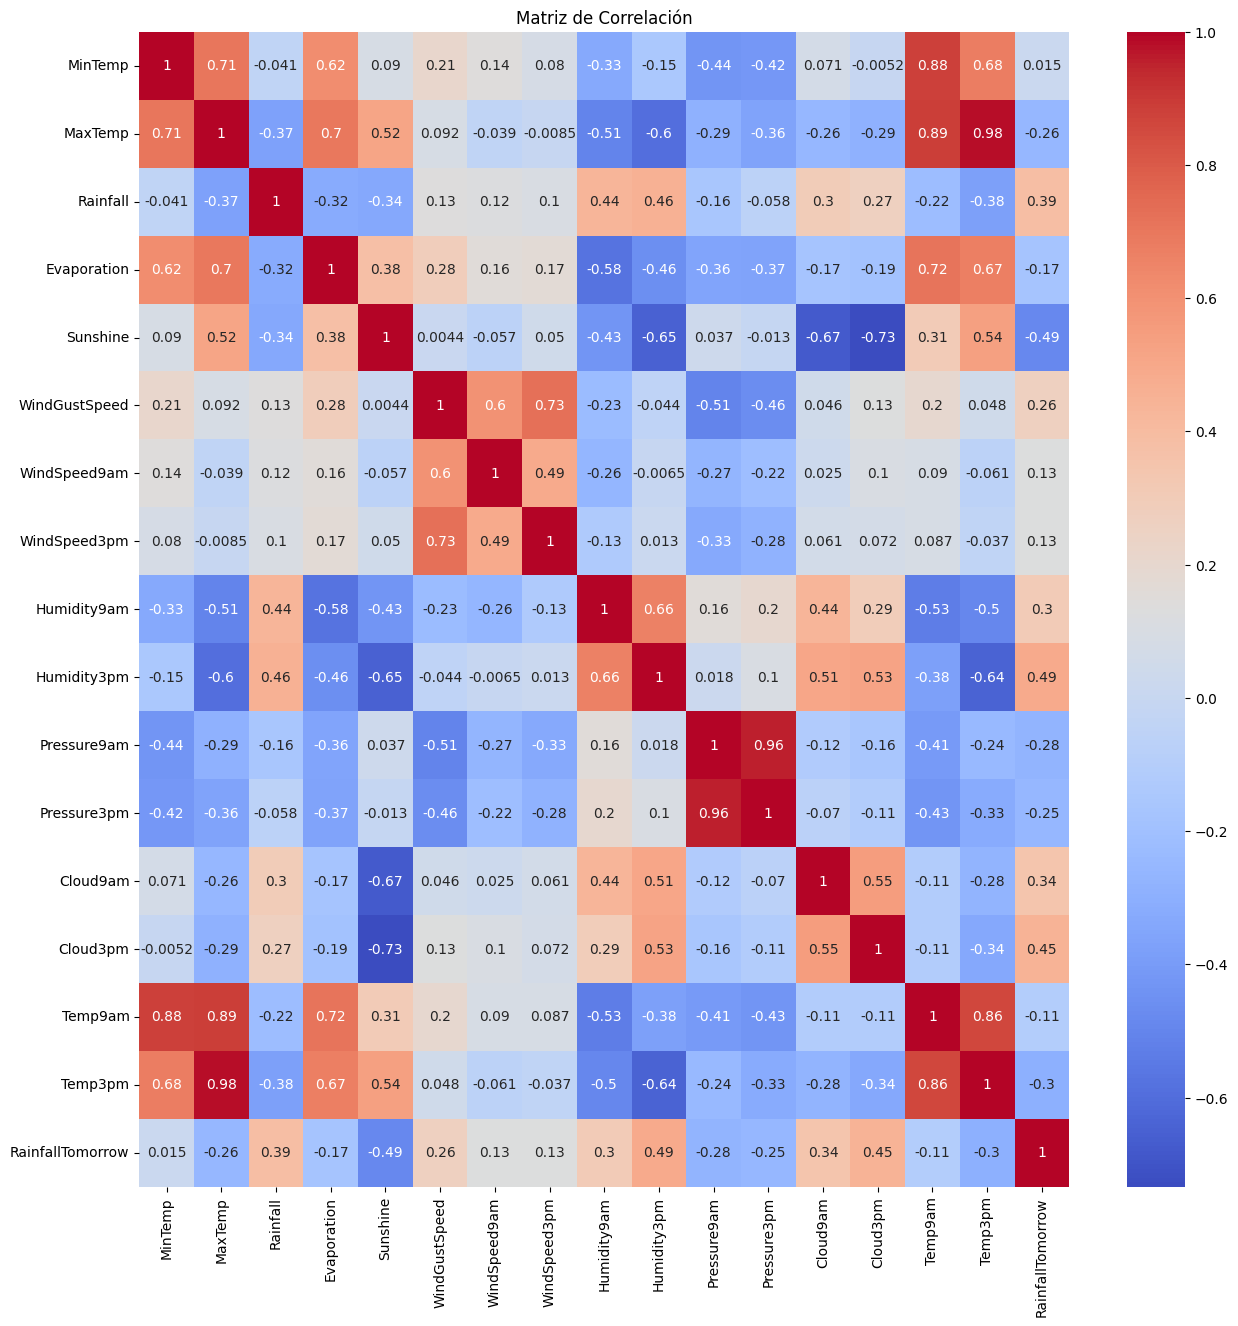

In [81]:
corr_matrix = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1).corr(method='spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Escalado de Datos

### Escalado de las Variables Numéricas

#### 1. Eliminación de Columnas No Numéricas

Se eliminan las columnas no numéricas del DataFrame original.

#### 2. Escalado de las Variables Numéricas

Las variables numéricas se escalan utilizando RobustScaler.

#### 3. Visualización de las Primeras Filas del DataFrame Escalado

Se muestra una vista previa de las primeras 10 filas del DataFrame con las variables numéricas escaladas.


In [82]:
df_numerico = df.drop(['Date','Location','WindGustDir', 'WindDir9am','WindDir3pm','Season','RainToday','RainTomorrow'], axis=1)

In [83]:
scaler = RobustScaler()
numerico_escalado = scaler.fit_transform(df_numerico)
df_numerico_escalado = pd.DataFrame(numerico_escalado)
df_numerico_escalado.columns = df_numerico.columns
df_numerico_escalado.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
0,-0.328947,0.363636,0.00,-0.142857,-0.158730,-0.529412,-0.538462,0.090909,-0.111111,-0.777778,0.13,-0.131313,0.2,0.2,-0.013158,0.463158,4.50
1,0.460526,0.626263,4.50,0.095238,0.380952,0.000000,-0.692308,-0.181818,0.333333,-0.518519,-0.60,-0.797980,-0.2,-0.6,0.394737,0.684211,4.50
2,0.421053,0.272727,4.50,0.428571,-0.634921,2.705882,-0.538462,-1.181818,0.407407,0.703704,-0.89,-0.919192,0.4,0.2,0.118421,0.105263,49.75
3,0.368421,-0.525253,49.75,0.761905,0.285714,0.882353,1.307692,0.454545,-0.333333,0.222222,-1.29,-0.939394,-0.8,0.2,-0.131579,-0.536842,3.50
4,-0.381579,-0.464646,3.50,0.380952,0.523810,0.647059,0.538462,0.818182,-0.111111,-0.037037,-0.01,0.222222,0.2,0.2,-0.447368,-0.400000,0.00
5,-0.565789,-0.383838,0.00,0.428571,0.142857,0.294118,0.538462,0.454545,-0.037037,0.259259,0.54,0.545455,0.2,-0.2,-0.473684,-0.463158,0.25
6,-0.578947,-0.252525,0.25,0.047619,0.174603,0.235294,0.461538,0.636364,-0.296296,-0.111111,0.62,0.595960,-0.4,0.0,-0.276316,-0.200000,0.00
7,-0.289474,-0.373737,0.00,0.380952,-0.428571,0.117647,-0.153846,0.454545,-0.222222,0.259259,0.78,0.797980,0.0,0.2,-0.315789,-0.389474,0.00
8,-0.223684,-0.121212,0.00,0.000000,-0.507937,0.529412,0.461538,-0.181818,-0.037037,-0.074074,0.77,0.646465,0.2,0.2,-0.052632,-0.031579,20.25
9,-0.276316,0.212121,20.25,0.333333,0.063492,-0.470588,-0.461538,-1.181818,0.407407,-0.666667,0.57,0.444444,0.2,-1.0,-0.157895,0.263158,0.00


## Graficos

### ¿Cuánto llueve en proporción a cada estación en base a la ciudad?
#### 1. Agrupación por Ciudad, Lluvia y Estación

Se agrupa el DataFrame por ciudad, lluvia prevista para el día siguiente y estación. Luego se calcula la suma de la lluvia para cada combinación de ciudad y estación.

#### 2. Agrupación por Ciudad y Lluvia Mañana

Se realiza una segunda agrupación por ciudad y lluvia prevista para el día siguiente para obtener la suma total de lluvia para cada ciudad.

#### 3. Fusión de Datos en Ciudad

Se fusionan los DataFrames anteriores en base a la ciudad para calcular la proporción de lluvia para cada ciudad y estación.

#### 4. Cálculo de la Proporción

Se calcula la proporción de lluvia para cada ciudad y estación dividiendo la lluvia prevista para el día siguiente entre la suma total de lluvia para esa ciudad.

#### 5. Pivotado y Visualización de Datos

Se pivotan los datos para mostrar la proporción de lluvia por ciudad y estación, y se visualizan en un gráfico de barras.

---

Este proceso permite analizar la proporción de lluvia prevista para el día siguiente por ciudad y estación, proporcionando información útil para la planificación y la toma de decisiones relacionadas con el clima.


In [84]:
# Primero agrupamos el df por ciudad, lluvia y estacion
lluvia_ciudad=df[["Location","RainfallTomorrow","Season"]] 
lluvia_ciudad = lluvia_ciudad.groupby(['Location', 'Season'])['RainfallTomorrow'].sum().reset_index()
#lluvia_ciudad

In [85]:
# Realizamos una agrupacion por locacion y lluvia mañana
suma_ciudad = lluvia_ciudad.groupby('Location')['RainfallTomorrow'].sum().reset_index()

# Mergeamos en Ciudad
lluvia_ciudad = lluvia_ciudad.merge(suma_ciudad, on='Location', suffixes=('', '_total'))  

# Calculamos la proporcion
lluvia_ciudad['Proportion'] = lluvia_ciudad['RainfallTomorrow'] / lluvia_ciudad['RainfallTomorrow_total']
lluvia_ciudad = lluvia_ciudad.drop('RainfallTomorrow_total', axis=1)

#lluvia_ciudad

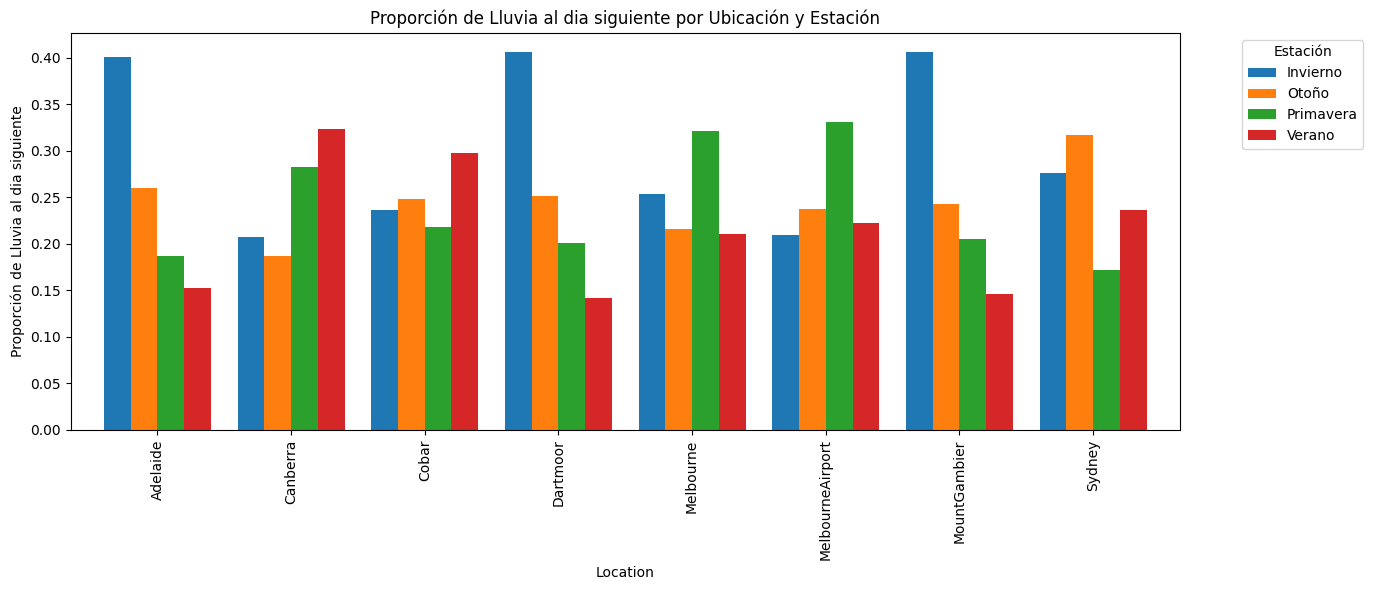

In [86]:
pivoteado = lluvia_ciudad.pivot(index='Location', columns='Season', values='Proportion')
ax = pivoteado.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Location')
plt.ylabel('Proporción de Lluvia al dia siguiente')
plt.title('Proporción de Lluvia al dia siguiente por Ubicación y Estación')
plt.tight_layout()
plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Proceso para Visualización de Distribuciones de Variables Escaladas

#### 1. Creación de Subgráficos

Se crean subgráficos en una cuadrícula de 2x2 utilizando `plt.subplots`, especificando el tamaño de la figura.

#### 2. Visualización de las Distribuciones

Se utilizan gráficos de histograma con estimación de densidad de kernel (`sns.histplot`) para visualizar las distribuciones de las variables escaladas.

- **MinTemp**: Temperatura Mínima.
- **MaxTemp**: Temperatura Máxima.
- **Rainfall**: Precipitación.
- **Sunshine**: Horas de Sol.

#### 3. Configuración de Títulos y Etiquetas

Se establece un título principal para la figura.

#### 4. Mostrar la Figura

Se muestra la figura con todas las distribuciones de las variables escaladas.

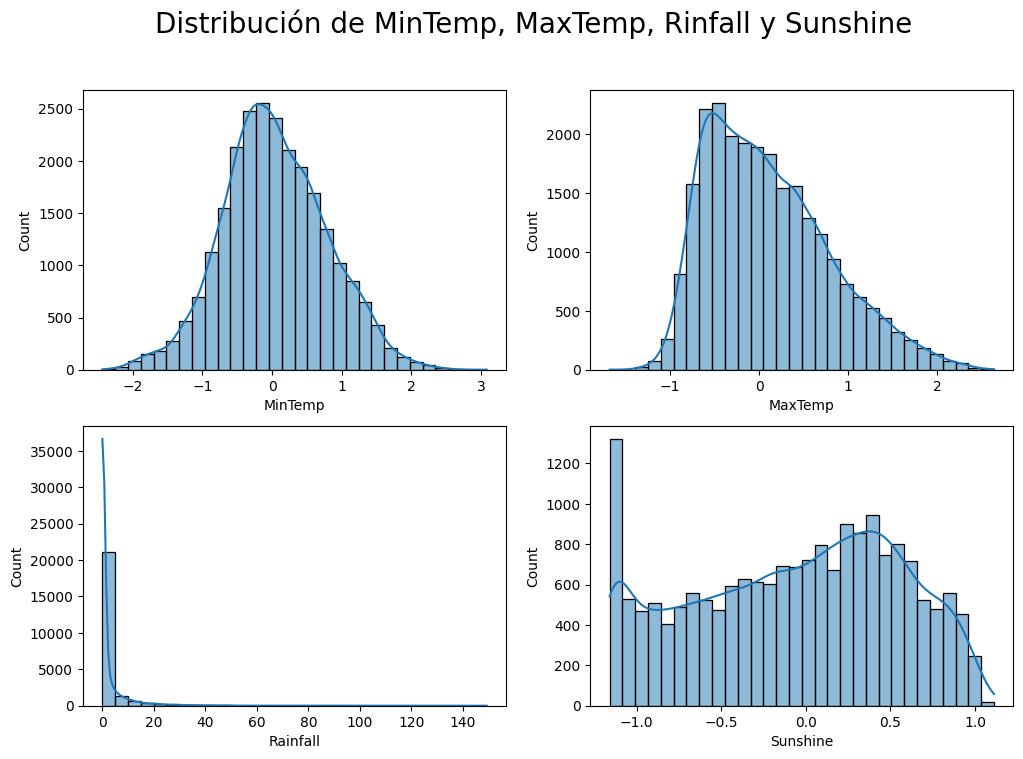

In [87]:
#fig, ax = plt.subplots(2,2,figsize = (12,6), sharex=True, sharey=True)
fig, ax = plt.subplots(2,2,figsize = (12,8))

#plt.figure(figsize=(12, 8))
sns.histplot(data=df_numerico_escalado['MinTemp'], bins=30, kde=True, ax = ax[0,0])
#ax[0,0].set_title('MinTemp')

sns.histplot(data=df_numerico_escalado['MaxTemp'], bins=30, kde=True, ax = ax[0,1])
#ax[0,1].set_title('MaxTemp')

sns.histplot(data=df_numerico_escalado['Rainfall'], bins=30, kde=True, ax = ax[1,0])
#ax[1,0].set_title('Rainfall')

sns.histplot(data=df_numerico_escalado['Sunshine'], bins=30, kde=True, ax = ax[1,1])
#ax[1,1].set_title('Sunshine')

plt.suptitle("Distribución de MinTemp, MaxTemp, Rinfall y Sunshine", fontsize = 20)

#plt.xlabel('Valor')
#plt.ylabel('Frecuencia')
plt.show()

### Proceso para Visualización de Boxplot de Variables

#### 1. Configuración de la Figura

Se establece el tamaño de la figura utilizando `plt.figure(figsize=(12, 8))`.

#### 2. Visualización del Boxplot

Se utiliza `sns.boxplot` para mostrar un boxplot de las variables 'Humidity9am', 'Humidity3pm', 'WindSpeed9am' y 'WindSpeed3pm'.

#### 3. Configuración de Títulos y Etiquetas

Se establece el título del gráfico y las etiquetas de los ejes y se realiza una rotación de 45 grados en las etiquetas del eje x para una mejor legibilidad.

#### 4. Mostrar la Figura

Se muestra la figura con el boxplot de las variables seleccionadas.

---

Este proceso proporciona una visualización rápida y efectiva de la distribución de los datos y los posibles valores atípicos en las variables seleccionadas.


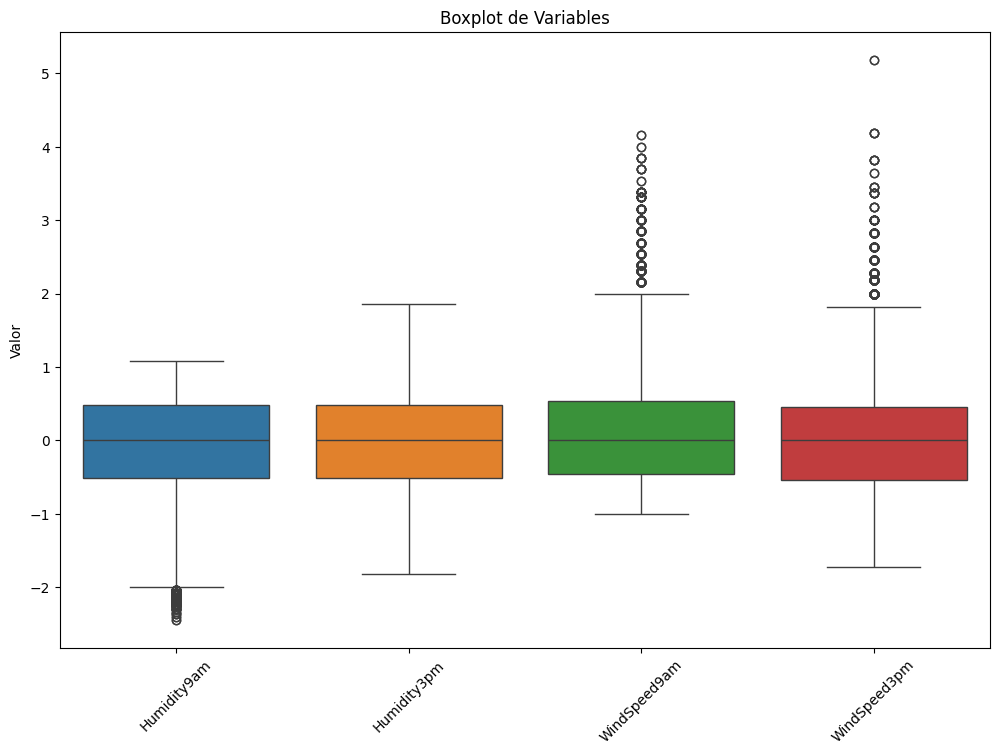

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numerico_escalado[['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm']])
plt.title('Boxplot de Variables')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribución de variables numéricas')

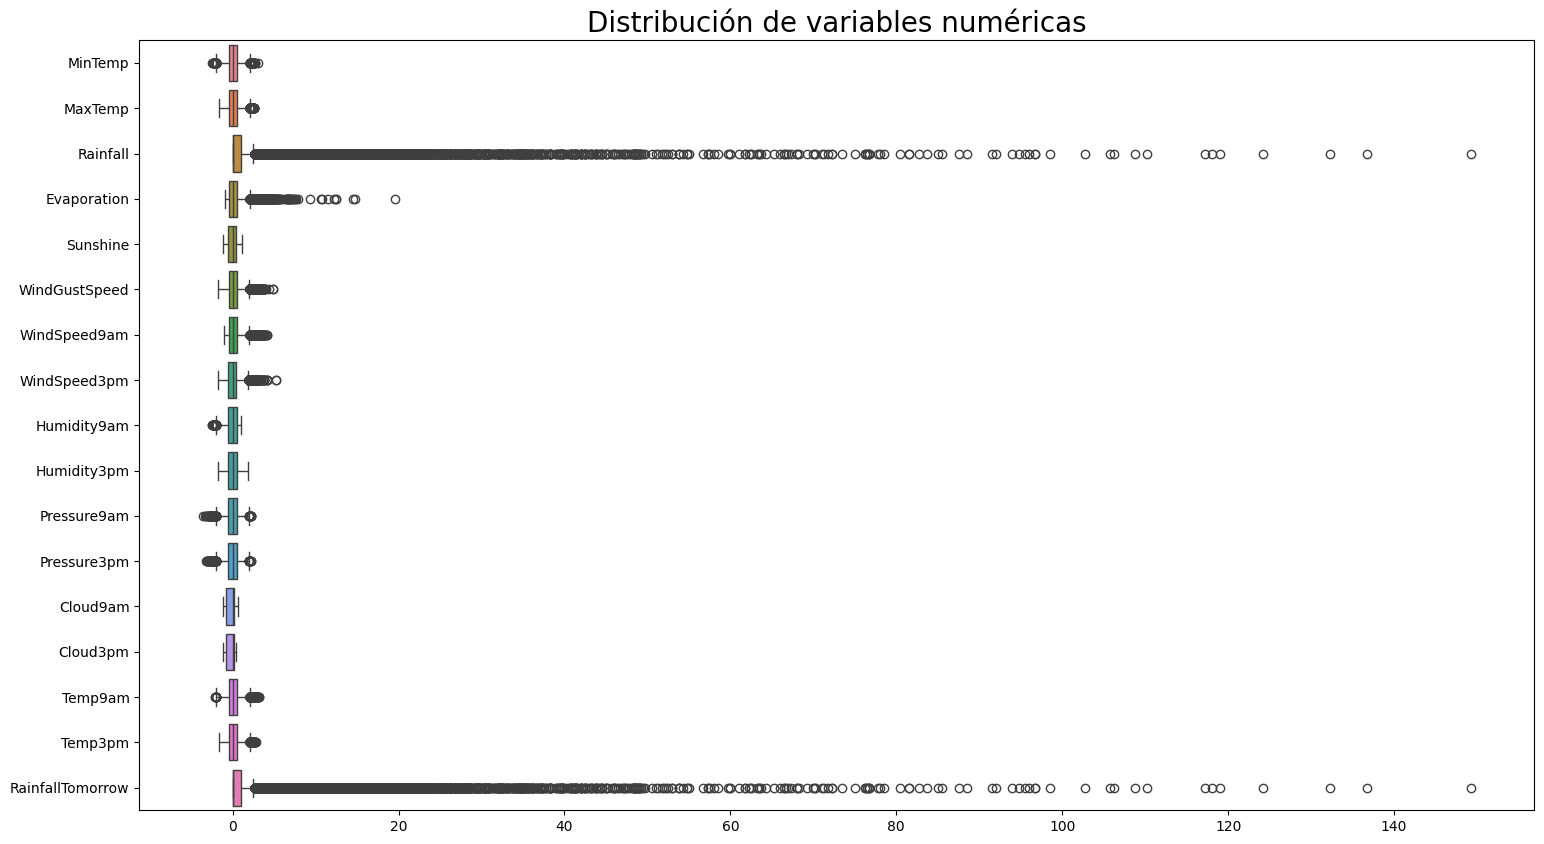

In [89]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_numerico_escalado, orient='h')
plt.title("Distribución de variables numéricas", fontsize = 20)

### Proceso para Obtener Correlación con la Variable 'RainfallTomorrow'

#### 1. Obtención de la Correlación

Se accede a la columna 'RainfallTomorrow' de la matriz de correlación `corr_matrix` y se ordenan los valores de manera descendente utilizando `.sort_values(ascending=False)`.

#### 2. Interpretación de Resultados
Se obtiene una serie ordenada que muestra la correlación de cada variable con 'RainfallTomorrow', donde los valores positivos indican una correlación positiva y los valores negativos indican una correlación negativa.

In [90]:
corr_matrix['RainfallTomorrow'].sort_values(ascending=False)

RainfallTomorrow    1.000000
Humidity3pm         0.489942
Cloud3pm            0.449607
Rainfall            0.385596
Cloud9am            0.343558
Humidity9am         0.302474
WindGustSpeed       0.261914
WindSpeed9am        0.132988
WindSpeed3pm        0.128658
MinTemp             0.015029
Temp9am            -0.108566
Evaporation        -0.174936
Pressure3pm        -0.254146
MaxTemp            -0.258425
Pressure9am        -0.279509
Temp3pm            -0.299044
Sunshine           -0.488825
Name: RainfallTomorrow, dtype: float64

### Proceso para Visualización de Scatterplots

#### 1. Configuración de la Figura y Subgráficos

Se crea una figura con dos subgráficos en una fila utilizando `plt.subplots(1, 2, figsize=(12,5))`.

#### 2. Visualización de los Scatterplots

Se utiliza `sns.scatterplot` para mostrar dos scatterplots:
- Scatterplot 1: Relación entre la humedad a las 3pm y la lluvia al día siguiente.
- Scatterplot 2: Relación entre la luz solar y la lluvia al día siguiente.

#### 3. Configuración de Títulos

Se establecen los títulos para cada scatterplot utilizando `ax.set_title()`.

#### 4. Mostrar la Figura

Se muestra la figura con los scatterplots.

---

Este proceso proporciona una visualización clara de la relación entre la humedad a las 3pm, la luz solar y la lluvia al día siguiente, lo que puede ayudar en el análisis de posibles patrones o correlaciones entre estas variables.


Text(0.5, 1.0, 'Relación entre la luz solar y\n la lluvia al día siguiente')

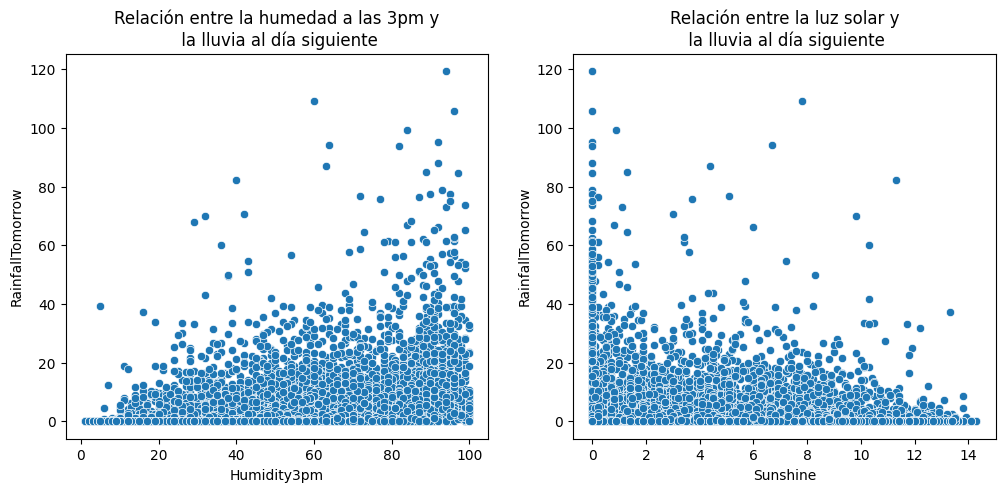

In [91]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Humidity3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre la humedad a las 3pm y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Sunshine', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la luz solar y\n la lluvia al día siguiente")

### Proceso para Visualización de Scatterplots

#### 1. Configuración de la Figura y Subgráficos

Se crea una figura con dos subgráficos en una fila utilizando `plt.subplots(1, 2, figsize=(12,5))`.

#### 2. Visualización de los Scatterplots

Se utiliza `sns.scatterplot` para mostrar dos scatterplots:
- Scatterplot 1: Relación entre las nubes del día y la lluvia al día siguiente.
- Scatterplot 2: Relación entre la temperatura a las 3pm y la lluvia al día siguiente.

#### 3. Configuración de Títulos

Se establecen los títulos para cada scatterplot utilizando `ax.set_title()`.

#### 4. Mostrar la Figura

Se muestra la figura con los scatterplots.

---

Este proceso proporciona una visualización clara de la relación entre las nubes del día, la temperatura a las 3pm y la lluvia al día siguiente, lo que puede ayudar en el análisis de posibles patrones o correlaciones entre estas variables.


Text(0.5, 1.0, 'Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente')

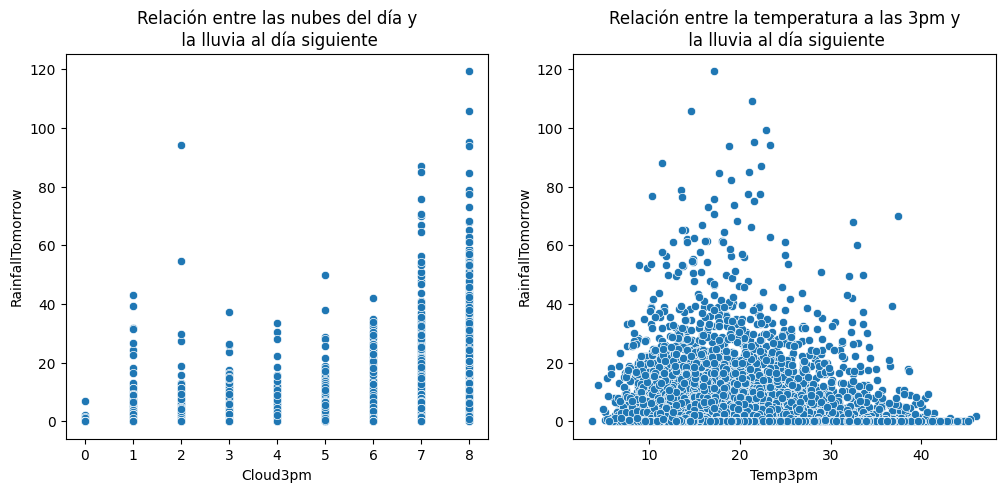

In [92]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.scatterplot(data = df, x='Cloud3pm', y='RainfallTomorrow', ax=ax[0])
ax[0].set_title("Relación entre las nubes del día y\n la lluvia al día siguiente")
sns.scatterplot(data = df, x='Temp3pm', y='RainfallTomorrow', ax=ax[1])
ax[1].set_title("Relación entre la temperatura a las 3pm y\n la lluvia al día siguiente")

### Proceso para Visualización de Scatterplots y Violinplots

#### 1. Configuración de la Figura y Subgráficos

Se crea una figura con dos subgráficos en una cuadrícula de 2x2 utilizando `plt.subplots(2, 2, figsize=(14,6))`.

#### 2. Visualización de los Scatterplots

Se utiliza `sns.scatterplot` para mostrar dos scatterplots:
- Scatterplot 1: Relación entre la lluvia del día y la lluvia al día siguiente.
- Scatterplot 2: Relación entre la presión a las 9am y la lluvia al día siguiente.

#### 3. Configuración de Títulos

Se establecen los títulos para cada scatterplot utilizando `ax.set_title()`.

#### 4. Visualización de los Violinplots

Se utiliza `sns.violinplot` para mostrar dos violinplots:
- Violinplot 1: Distribución de la lluvia del día.
- Violinplot 2: Distribución de la presión a las 9am.

#### 5. Ajuste de Espaciado

Se ajusta el espacio entre los subgráficos vertical y horizontalmente utilizando `plt.subplots_adjust(wspace=0.2, hspace=0.5)`.

#### 6. Mostrar la Figura

Se muestra la figura con los scatterplots y violinplots.

---

Este proceso proporciona una visualización completa de la relación entre la lluvia del día, la presión a las 9am y la lluvia al día siguiente, así como la distribución de estas variables.


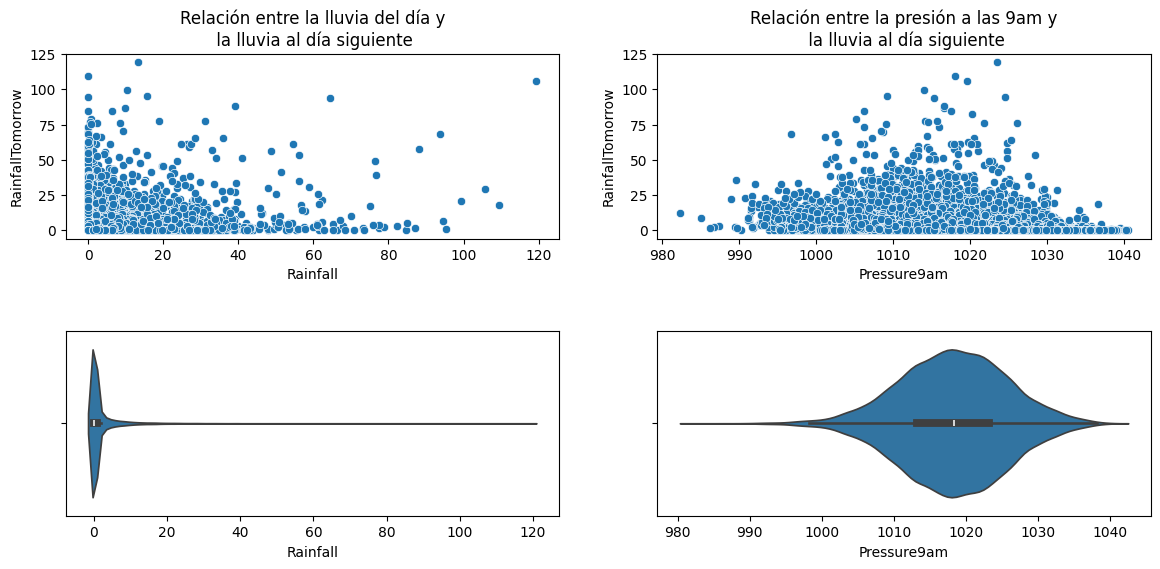

In [93]:
fig, ax = plt.subplots(2,2, figsize=(14,6))

sns.scatterplot(data = df, x='Rainfall', y='RainfallTomorrow', ax=ax[0,0])
ax[0,0].set_title("Relación entre la lluvia del día y\n la lluvia al día siguiente")
sns.violinplot(data = df['Rainfall'], ax=ax[1,0], orient='h')

sns.scatterplot(data = df, x='Pressure9am', y='RainfallTomorrow', ax=ax[0,1])
ax[0,1].set_title("Relación entre la presión a las 9am y\n la lluvia al día siguiente")
sns.violinplot(data = df['Pressure9am'], ax=ax[1,1], orient='h')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Split Train - Test

### Proceso para Codificación de Variables Categóricas y División de Datos

#### 1. Codificación de Variables Categóricas

Se utiliza `pd.get_dummies` para codificar las variables categóricas del DataFrame `df`. Se eliminan las columnas originales después de la codificación.

#### 2. División de Datos

Se calcula la cantidad de filas en el DataFrame codificado y se divide en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento representa el 80% de los datos y el conjunto de prueba el 20%.

#### 3. Preparación de Datos para Entrenamiento y Prueba

Se separan las variables predictoras (X) de las variables objetivo (y) para ambos conjuntos de entrenamiento y prueba. Se eliminan las columnas 'Date' del conjunto de datos predictoras, ya que no son relevantes para el modelo.

- **Para Entrenamiento**:
  - X_train: Variables predictoras para entrenamiento.
  - y1_train: Variable objetivo 'RainTomorrow' para entrenamiento.
  - y2_train: Variable objetivo 'RainfallTomorrow' para entrenamiento.

- **Para Prueba**:
  - X_test: Variables predictoras para prueba.
  - y1_test: Variable objetivo 'RainTomorrow' para prueba.
  - y2_test: Variable objetivo 'RainfallTomorrow' para prueba.

#### 4. Mostrar Columnas del DataFrame Codificado

```python
df_encoded.columns


In [94]:
# Codificación de variables categóricas
columns = ['Location', 'WindGustDir', 'RainToday', 'WindDir9am','WindDir3pm']
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)
df_encoded.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'RainfallTomorrow', 'Season',
       'Location_Canberra', 'Location_Cobar', 'Location_Dartmoor',
       'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_MountGambier', 'Location_Sydney', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'RainToday_Yes', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_

In [95]:
# Dividimos
cantFilas = df_encoded.shape[0]
cantEntrenamiento = cantFilas*0.8
cantTest = cantFilas*0.2
cantEntrenamiento, cantTest

(20180.0, 5045.0)

In [96]:
entrenamiento = df_encoded.head(int(cantEntrenamiento))
testeo = df_encoded.tail(int(cantTest))

In [97]:
#Para entrenamiento
X_train = entrenamiento.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_train = entrenamiento['RainTomorrow']
y2_train = entrenamiento['RainfallTomorrow']

#Para test
X_test = testeo.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1)
y1_test = testeo['RainTomorrow']
y2_test = testeo['RainfallTomorrow']

In [98]:
X_train.drop('Date', axis = 1, inplace = True)
X_test.drop('Date', axis = 1, inplace = True)

## Nulos

### Verificación de Valores Nulos y Tamaño de Conjuntos de Datos

#### 1. Verificación de Valores Nulos en el Conjunto de Entrenamiento
#### 2. Verificación de Valores Nulos en el Conjunto de Prueba
#### 3. Verificación de Tamaño de Conjuntos de Datos y Variables Objetivo
#### 4. Verificación de Valores Nulos en Variables Objetivo

Este proceso permite verificar la integridad de los datos antes de proceder con el modelado, asegurando que no haya valores nulos en las variables predictoras ni en las variables objetivo.

In [99]:
X_train.iloc[:,:20].isnull().sum()


MinTemp               354
MaxTemp               341
Rainfall              739
Evaporation          1977
Sunshine             3942
WindGustSpeed        1518
WindSpeed9am          348
WindSpeed3pm          336
Humidity9am           601
Humidity3pm           556
Pressure9am           615
Pressure3pm           613
Cloud9am             7165
Cloud3pm             7454
Temp9am               369
Temp3pm               363
Season                  0
Location_Canberra       0
Location_Cobar          0
Location_Dartmoor       0
dtype: int64

In [100]:

X_test.iloc[:,:20].isnull().sum()

MinTemp               215
MaxTemp               217
Rainfall              243
Evaporation          2330
Sunshine             2755
WindGustSpeed          73
WindSpeed9am            7
WindSpeed3pm            3
Humidity9am           337
Humidity3pm           330
Pressure9am           216
Pressure3pm           213
Cloud9am             2198
Cloud3pm             2096
Temp9am               215
Temp3pm               212
Season                  0
Location_Canberra       0
Location_Cobar          0
Location_Dartmoor       0
dtype: int64

In [101]:
y1_train.shape, X_train.shape, y1_test.shape, X_test.shape
# Salida: ((20180,), (20180, 70), (5045,), (5045, 70))

((20180,), (20180, 70), (5045,), (5045, 70))

In [102]:
y1_train.isnull().sum()
y1_test.isnull().sum()

242

### Nulos Numericos Train - Test

#### Proceso para Imputación de Valores Nulos y Eliminación de Datos

##### 1. Creación de la Función `nulos_mediana`

Se define la función `nulos_mediana` para imputar los valores nulos utilizando la mediana de la columna agrupada por estación.

##### 2. Imputación de Valores Nulos

Se utilizan llamadas a la función `nulos_mediana` para imputar los valores nulos en diferentes columnas del conjunto de datos tanto de entrenamiento como de prueba.

- Se imputan los valores nulos en columnas como 'MinTemp', 'MaxTemp', 'Rainfall', 'Pressure9am', etc.

##### 3. Eliminación de Datos con Valores Nulos en la Variable Objetivo

Se eliminan las filas correspondientes a los valores nulos en las variables objetivo 'y1_train' y 'y2_train'.

##### 4. Verificación de Proporción de Valores Nulos

Se calcula la proporción de valores nulos en 'y1_train' y 'y2_train' con respecto al total de datos.

##### 5. Eliminación de Filas con Valores Nulos en el Conjunto de Entrenamiento

Se eliminan las filas del conjunto de entrenamiento 'X_train' correspondientes a los valores nulos en las variables objetivo 'y1_train' y 'y2_train'.

---

Este proceso permite manejar de manera adecuada los valores nulos en el conjunto de datos y garantiza la integridad de los conjuntos de entrenamiento y prueba.


In [103]:
"""
Esta funcion la creamos para poder setear las medianas por locación y estación.
Principalmente creímos que esto es lo apropiado debido a que aspectos como la temperatura,
lluvia, presión, etc., son sensibles tanto a la región como a la estación en la que se miden.
Nos pareció apropiado distinguir las medianas de según cada región y estación del año.
"""

def nulos_mediana(data, col):
    mediana = data.groupby(['Season'])[col].transform('median')
    data.loc[data[col].isnull(), col] = mediana

In [104]:
# Min temp
nulos_mediana(X_train,'MinTemp')
nulos_mediana(X_test,'MinTemp')

# Max temp
nulos_mediana(X_train,'MaxTemp')
nulos_mediana(X_test,'MaxTemp')

# Rainfall
nulos_mediana(X_train,'Rainfall')
nulos_mediana(X_test,'Rainfall')

# Evaporation
nulos_mediana(X_train, 'Evaporation')
nulos_mediana(X_test, 'Evaporation')

# Pressure9am
nulos_mediana(X_train,'Pressure9am')
nulos_mediana(X_test,'Pressure9am')

# Pressure3pm
nulos_mediana(X_train,'Pressure3pm')
nulos_mediana(X_test,'Pressure3pm')

# Temp9am , 3pm
nulos_mediana(X_train,'Temp9am')
nulos_mediana(X_test,'Temp9am')
              
nulos_mediana(X_train,'Temp3pm')
nulos_mediana(X_test,'Temp3pm')

# WindGustSpeed
nulos_mediana(X_train,'WindGustSpeed')
nulos_mediana(X_test,'WindGustSpeed')

# WindSpeed
nulos_mediana(X_train,'WindSpeed9am')
nulos_mediana(X_test,'WindSpeed9am')

nulos_mediana(X_train,'WindSpeed3pm')
nulos_mediana(X_test,'WindSpeed3pm')

# Sunshine
nulos_mediana(X_train,'Sunshine')
nulos_mediana(X_test,'Sunshine')

# Humidity 9am
nulos_mediana(X_train,'Humidity9am')
nulos_mediana(X_test,'Humidity9am')

nulos_mediana(X_train,'Humidity3pm')
nulos_mediana(X_test,'Humidity3pm')

# Cloud
nulos_mediana(X_train, 'Cloud9am')
nulos_mediana(X_test, 'Cloud9am')

nulos_mediana(X_train,'Cloud3pm')
nulos_mediana(X_test,'Cloud3pm')

In [105]:
y1_train.isnull().sum(), y2_train.isnull().sum()

(739, 739)

In [106]:
#Creamos arrays con los indices de cada df que contienen valore nulos
y1IndicesNulos = y1_train[y1_train.isnull() == True].index
y2IndicesNulos = y2_train[y2_train.isnull() == True].index

In [107]:
#Comprobamos que los indces sean iguales
np.unique(y1IndicesNulos == y2IndicesNulos)

array([ True])

In [108]:
print("Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos: ", y1IndicesNulos.shape[0]/y1_train.shape[0])
# Salida: Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos:  0.03662041625371655

Proporcion de nulos de y1_train e y2_train con respeccto a la totalidad de los datos:  0.03662041625371655


In [109]:
#Eliminamos esos indices del conjunto de entrenamiento
X_train = X_train[X_train.index.isin(y1IndicesNulos)==False]
X_train.shape

(19441, 70)

In [110]:
y1_train = y1_train.dropna()
y2_train = y2_train.dropna()
y1_train.shape, y2_train.shape

((19441,), (19441,))

### Nulos testeo

### Proceso para Manejo de Valores Nulos en Conjuntos de Prueba

#### 1. Conteo de Valores Nulos

Se realiza un conteo de valores nulos en los conjuntos de prueba `y1_test` y `y2_test`.

#### 2. Identificación de Índices de Valores Nulos

Se identifican los índices de los valores nulos en los conjuntos de prueba `y1_test` y `y2_test`.

#### 3. Comparación de Índices de Valores Nulos

Se comparan los índices de valores nulos en `y1_test` y `y2_test` para verificar si son los mismos.

#### 4. Proporción de Valores Nulos Eliminados

Se calcula la proporción de valores nulos eliminados respecto al tamaño original de `y1_test`.

#### 5. Eliminación de Filas con Valores Nulos

Se eliminan las filas con valores nulos de los conjuntos de prueba `X_test`, `y1_test` y `y2_test`.

#### 6. Confirmación del Tamaño de los Conjuntos de Prueba

Se muestra el nuevo tamaño de los conjuntos de prueba `y1_test` y `y2_test`.



In [111]:

X_test.iloc[:,:20].isnull().any()

MinTemp              False
MaxTemp              False
Rainfall             False
Evaporation          False
Sunshine             False
WindGustSpeed        False
WindSpeed9am         False
WindSpeed3pm         False
Humidity9am          False
Humidity3pm          False
Pressure9am          False
Pressure3pm          False
Cloud9am             False
Cloud3pm             False
Temp9am              False
Temp3pm              False
Season               False
Location_Canberra    False
Location_Cobar       False
Location_Dartmoor    False
dtype: bool

In [112]:
y1_test.isnull().sum(), y2_test.isnull().sum()

(242, 242)

In [113]:
listaNulosy1Test = y1_test[y1_test.isnull()].index
listaNulosy2Test = y2_test[y2_test.isnull()].index

In [114]:
np.unique(listaNulosy1Test == listaNulosy2Test)

array([ True])

In [115]:
len(listaNulosy1Test)/y1_test.shape[0]

0.047968285431119924

In [116]:
X_test = X_test[X_test.index.isin(listaNulosy1Test)==False]
y1_test = y1_test.dropna()
y2_test = y2_test.dropna()
y1_test.shape, y2_test.shape

((4803,), (4803,))

### Eliminamos Season

#### Proceso para Codificación One-Hot y Manejo de Valores Nulos en Conjuntos de Entrenamiento y Prueba

##### 1. Codificación One-Hot de la Variable 'Season'

Se realiza la codificación one-hot de la variable 'Season' en los conjuntos de entrenamiento (`X_train`) y prueba (`X_test`) utilizando `pd.get_dummies`, con la opción `drop_first=True` para evitar la multicolinealidad.

##### 2. Identificación de Valores Nulos en Conjunto de Prueba

Se realiza un conteo de valores nulos en el conjunto de prueba (`X_test`) utilizando `isna().sum()`, y se identifican las columnas con valores nulos.

##### 3. Identificación de Valores Nulos en Conjunto de Entrenamiento

Se realiza un conteo de valores nulos en el conjunto de entrenamiento (`X_train`) utilizando `isna().sum()`, y se identifican las columnas con valores nulos.

---




In [117]:
X_train = pd.get_dummies(X_train, columns=['Season'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Season'], drop_first=True)

In [118]:
null_counts = X_test.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


In [119]:
null_counts = X_train.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


Series([], dtype: int64)


## Balanceado

### ¿Está balanceado?

1. Vemos que en este caso, va  a predecir mejor cuando no llueve, que cuándo llueve y cuánto llueve

-----------------

In [120]:
df["RainTomorrow"].value_counts()


RainTomorrow
No     18547
Yes     5697
Name: count, dtype: int64

## Estandarización de los datos

### Proceso para Preparación de Datos en Problema de Regresión

#### 1. Creación de DataFrames para Entrenamiento y Prueba

Se crean DataFrames (`df_train_regresion` y `df_test_regresion`) combinando las características (`X_train` y `X_test`, respectivamente) con la variable objetivo (`y1_train` y `y1_test`, respectivamente).

#### 2. Codificación de la Variable Objetivo

Se cambian los valores de la variable objetivo 'RainTomorrow' a 1's y 0's.

#### 3. Separación de Características y Variable Objetivo

Se separan las características (`df_x_train` y `df_x_test`) de la variable objetivo (`df_y_train` y `df_y_test`).

#### 4. Manejo de Valores Nulos en Variable Objetivo

Se utiliza el método 'ffill' para rellenar los valores nulos en la variable objetivo (`df_y_train` y `df_y_test`), utilizando el valor del registro anterior.

#### 5. Escalado de Características

Se escalan las características por separado para evitar contaminar el entrenamiento del modelo, utilizando `StandardScaler`.

---

In [121]:
#Creamos df para cada par de train y test respectivamente
df_train_regresion = pd.concat([X_train,y1_train], axis = 1)
df_test_regresion = pd.concat([X_test,y1_test], axis = 1)

In [122]:
#Cambiamos los valores de RainTomorrow para que estos sean de 1's y 0's.
df_train_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_test_regresion['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [123]:
df_x_train = df_train_regresion.iloc[:,:-1] #Seleccionamos todas las columnas menos la ultima
df_y_train = df_train_regresion.iloc[:,-1] #Seleccionamos solo la ultima columna

df_x_test = df_test_regresion.iloc[:,:-1] #Todas menos la ultima para test
df_y_test = df_test_regresion.iloc[:,-1] #Solo la ultima para test

In [124]:
df_y_test = df_y_test.fillna(method='ffill') #ffill rellena nulos con el valor del registro anterior
df_y_train = df_y_train.fillna(method='ffill')

In [125]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(df_x_train) #X train y X test se escalan por separados para no ocntaminar el entrenamiento

In [126]:
x_test_scaled = scaler.fit_transform(df_x_test)

## Regresión Lineal

### Proceso para Entrenamiento del Modelo de Regresión Lineal

#### 1. Inicialización del Modelo

Se inicializa el modelo de regresión lineal utilizando `LinearRegression()`.

#### 2. Entrenamiento del Modelo

Se entrena el modelo utilizando las características escaladas de entrenamiento (`x_train_scaled`) y la variable objetivo correspondiente (`df_y_train`).

```python
regresion = LinearRegression()
regresion.fit(x_train_scaled, df_y_train)


In [127]:
regresion = LinearRegression()

In [128]:
regresion.fit(x_train_scaled, df_y_train)

LinearRegression()

### Métricas de Evaluación del Modelo de Regresión

Se definió una función `errores(y_test, y_pred)` para calcular diferentes métricas de evaluación del modelo de regresión, incluyendo R^2, MSE (Error Cuadrático Medio), RMSE (Raíz del Error Cuadrático Medio) y MAE (Error Absoluto Medio). Estas métricas proporcionan información sobre la capacidad predictiva del modelo y la precisión de las predicciones.

#### Métricas Calculadas:
- R^2: 0.35
- MSE: 0.12
- RMSE: 0.34
- MAE: 0.26

Estos valores indican que el modelo explica aproximadamente el 35% de la variabilidad de la variable objetivo, con un error medio cuadrático de 0.12, una raíz del error cuadrático medio de 0.34 y un error absoluto medio de 0.26.

---

Estas métricas son fundamentales para evaluar el rendimiento de un modelo de regresión y determinar su capacidad para hacer predicciones precisas sobre datos no observados.


In [129]:
from math import sqrt
def errores(y_test, y_pred):
    print('R2:   %.2f' % r2_score(y_test, y_pred))
    print('MSE:  %.2f' % mean_squared_error(y_test, y_pred))
    print('RMSE: %.2f' % sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:  %.2f' % mean_absolute_error(y_test, y_pred))

In [130]:
y_pred_regresion = regresion.predict(x_test_scaled)

errores(df_y_test, y_pred_regresion)

R2:   0.35
MSE:  0.12
RMSE: 0.34
MAE:  0.26


## Gradiente Descendiente

### Modelo de Regresión con Gradiente Descendiente

El modelo de regresión con gradiente descendiente (`SGDRegressor`) es una técnica de optimización utilizada para encontrar los parámetros óptimos de un modelo de regresión al minimizar una función de pérdida a través del gradiente descendiente.

#### ¿Cómo funciona el Gradiente Descendiente?

El gradiente descendiente es un algoritmo de optimización utilizado para encontrar los valores óptimos de los parámetros de un modelo, minimizando iterativamente una función de pérdida. En el contexto de la regresión, el gradiente descendiente ajusta los pesos del modelo en la dirección que reduce el error de predicción.

1. **Inicialización de Parámetros:** Se inicializan aleatoriamente los parámetros del modelo.
2. **Cálculo del Gradiente:** Se calcula el gradiente de la función de pérdida con respecto a los parámetros del modelo.
3. **Actualización de Parámetros:** Se actualizan los parámetros del modelo en la dirección opuesta al gradiente, utilizando una tasa de aprendizaje como factor de escala.
4. **Convergencia:** Se repiten los pasos 2 y 3 hasta que se alcanza un criterio de convergencia predefinido.

#### Comparación con la Regresión Lineal

A diferencia de la regresión lineal, que encuentra los parámetros del modelo de forma analítica (usando ecuaciones cerradas), el modelo de regresión con gradiente descendiente ajusta los parámetros de manera iterativa mediante el cálculo del gradiente de la función de pérdida. 

- **Ventajas del Gradiente Descendiente:** Puede ser más eficiente computacionalmente en conjuntos de datos muy grandes, ya que actualiza los parámetros de forma incremental en lugar de procesar todo el conjunto de datos a la vez.
- **Desventajas del Gradiente Descendiente:** Puede requerir una selección cuidadosa de la tasa de aprendizaje y un ajuste adecuado de los hiperparámetros para obtener un rendimiento óptimo del modelo.

#### Resultados Obtenidos:

Los resultados obtenidos con el modelo de regresión con gradiente descendiente son similares a los de la regresión lineal, con un R² Score cercano al 35% y un MSE alrededor de 0.117 tanto para el conjunto de entrenamiento como para el conjunto de prueba.


In [131]:
sgd_regressor = SGDRegressor() # Modelo de regresion con gradiente descendiente

In [132]:
sgd_regressor.fit(x_train_scaled, df_y_train)

SGDRegressor()

In [133]:
y_train_pred_sgd = sgd_regressor.predict(x_train_scaled)
y_test_pred_sgd = sgd_regressor.predict(x_test_scaled)


In [134]:
train_mse_sgd = mean_squared_error(df_y_train, y_train_pred_sgd) #error cuadratico medio entrenamiento
test_mse_sgd = mean_squared_error(df_y_test, y_test_pred_sgd) #error cuadratico medio test

train_r2_sgd = r2_score(df_y_train, y_train_pred_sgd) #r2 entrenamiento
test_r2_sgd = r2_score(df_y_test, y_test_pred_sgd) #r2 train

# Imprimir las métricas obtenidas
print("Métricas del modelo con Gradiente Descendiente:")
print("MSE (entrenamiento):", train_mse_sgd)
print("MSE (prueba):", test_mse_sgd)
print("R² Score (entrenamiento):", train_r2_sgd)
print("R² Score (prueba):", test_r2_sgd)

Métricas del modelo con Gradiente Descendiente:
MSE (entrenamiento): 0.11658773965385975
MSE (prueba): 0.117309402396878
R² Score (entrenamiento): 0.3521046601904759
R² Score (prueba): 0.3447616299633468


## Modelo Lasso

### Modelo de Regresión con Regularización Lasso

El modelo de regresión con regularización Lasso (`Lasso`) es una técnica de regresión lineal que incorpora un término de regularización L1 en la función de pérdida, lo que ayuda a prevenir el sobreajuste y a seleccionar características importantes al forzar algunos coeficientes del modelo a cero.

#### Regularización Lasso

La regularización Lasso agrega un término de penalización L1 a la función de pérdida del modelo, lo que lleva a que algunos coeficientes del modelo sean exactamente cero. Esto tiene el efecto de realizar la selección de características automáticamente, lo que puede resultar en modelos más simples y fáciles de interpretar.

#### Resultados Obtenidos

El modelo de regresión con regularización Lasso tiene un rendimiento similar al de la regresión lineal y al del gradiente descendiente, con un MSE (Error Cuadrático Medio) alrededor de 0.119 tanto para el conjunto de entrenamiento como para el de prueba. El R² (coeficiente de determinación) también es similar, alrededor del 33.6% para ambos conjuntos de datos.


In [135]:
lasso_regressor = Lasso(alpha=0.01) # Modelo de regresion con regularizacion lasso

In [136]:
lasso_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Lasso(alpha=0.01)

In [137]:
y_train_pred_lasso = lasso_regressor.predict(x_train_scaled)
y_test_pred_lasso = lasso_regressor.predict(x_test_scaled)

In [138]:
train_mse_lasso = mean_squared_error(df_y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(df_y_test, y_test_pred_lasso)

In [139]:
train_r2_lasso = r2_score(df_y_train, y_train_pred_lasso) #r2 entrenamiento
test_r2_lasso = r2_score(df_y_test, y_test_pred_lasso) #r2 train

In [140]:

print("Métricas del modelo Lasso:")
print("MSE (entrenamiento):", train_mse_lasso)
print("R² (entrenamiento): ",train_r2_lasso)
print("MSE (prueba):", test_mse_lasso)
print("R² (entrenamiento): ",test_r2_lasso)



Métricas del modelo Lasso:
MSE (entrenamiento): 0.11949247307901402
R² (entrenamiento):  0.3359626262584877
MSE (prueba): 0.11929832078365032
R² (entrenamiento):  0.3336524126691045


## Modelo Ridge

### Modelo de Regresión con Regularización Ridge

El modelo de regresión con regularización Ridge (`Ridge`) es una técnica de regresión lineal que incorpora un término de regularización L2 en la función de pérdida, lo que ayuda a prevenir el sobreajuste al penalizar coeficientes grandes.

#### Regularización Ridge

La regularización Ridge agrega un término de penalización L2 a la función de pérdida del modelo, lo que lleva a que los coeficientes del modelo sean más pequeños en general. Esto puede ayudar a prevenir el sobreajuste y mejorar la generalización del modelo.

#### Resultados Obtenidos

El modelo de regresión con regularización Ridge tiene un desempeño ligeramente mejor que el modelo Lasso y el de regresión lineal, con un MSE (Error Cuadrático Medio) alrededor de 0.116 tanto para el conjunto de entrenamiento como para el de prueba. El R² (coeficiente de determinación) también es ligeramente mayor, alrededor del 35.9% para el conjunto de entrenamiento y del 35.3% para el de prueba.


In [141]:
ridge_regressor = Ridge(alpha=0.01) # Modelo de regresion con regularizacion Ridge

In [142]:
ridge_regressor.fit(x_train_scaled, df_y_train) # Entrenamos

Ridge(alpha=0.01)

In [143]:
y_train_pred_ridge = ridge_regressor.predict(x_train_scaled)
y_test_pred_ridge = ridge_regressor.predict(x_test_scaled)

In [144]:
train_mse_ridge = mean_squared_error(df_y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(df_y_test, y_test_pred_ridge)

In [145]:
train_r2_ridge = r2_score(df_y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(df_y_test, y_test_pred_ridge)

In [146]:
print("\nMétricas del modelo Ridge:")
print("MSE (entrenamiento):", train_mse_ridge)
print("MSE (prueba):", test_mse_ridge)
print("R² (entrenamiento): ", train_r2_ridge)
print("R² (prueba): ", test_r2_ridge)


Métricas del modelo Ridge:
MSE (entrenamiento): 0.11547934731314363
MSE (prueba): 0.11583555663580064
R² (entrenamiento):  0.35826416061790156
R² (prueba):  0.3529938796760046


## Modelo Elastic Net

### Modelo de Regresión con ElasticNet

El modelo de regresión con ElasticNet (`ElasticNet`) es una combinación de la regularización L1 (Lasso) y L2 (Ridge), lo que permite seleccionar automáticamente las características más importantes mientras se regularizan los coeficientes.

#### ElasticNet

ElasticNet es un método que combina los términos de penalización L1 y L2 en la función de pérdida, lo que permite tener un control sobre el equilibrio entre la selección de características (sparse selection) y la estabilidad de los coeficientes.

#### Resultados Obtenidos

El modelo de regresión con ElasticNet muestra un desempeño menos satisfactorio en comparación con los modelos anteriores. El MSE (Error Cuadrático Medio) para el conjunto de entrenamiento es de aproximadamente 0.180 y para el conjunto de prueba es de aproximadamente 0.179. El R² (coeficiente de determinación) es muy cercano a cero tanto para el conjunto de entrenamiento como para el de prueba, lo que sugiere que el modelo no se ajusta bien a los datos y no es capaz de explicar la variabilidad en la variable objetivo.


In [147]:
elasticnet_regressor = ElasticNet() # Modelo con Elastic Net

In [148]:
elasticnet_regressor.fit(x_train_scaled, df_y_train) # Entrenamos


ElasticNet()

In [149]:
y_train_pred_elasticnet = elasticnet_regressor.predict(x_train_scaled)
y_test_pred_elasticnet = elasticnet_regressor.predict(x_test_scaled)

In [150]:
train_mse_elasticnet = mean_squared_error(df_y_train, y_train_pred_elasticnet)
test_mse_elasticnet = mean_squared_error(df_y_test, y_test_pred_elasticnet)

In [151]:
train_r2_elasticnet = r2_score(df_y_train, y_train_pred_elasticnet)
test_r2_elasticnet = r2_score(df_y_test, y_test_pred_elasticnet)

In [152]:
print("\nMétricas del modelo ElasticNet:")
print("MSE (entrenamiento):", train_mse_elasticnet)
print("MSE (prueba):", test_mse_elasticnet)
print("R² (entrenamiento): ", train_r2_elasticnet)
print("R² (prueba): ", test_r2_elasticnet)


Métricas del modelo ElasticNet:
MSE (entrenamiento): 0.17994841526122968
MSE (prueba): 0.1790361399719667
R² (entrenamiento):  0.0
R² (prueba):  -1.6589770025277062e-05


## ¿Fue un buen fitting?

### ¿Fue un buen fitting?

Para evaluar si el ajuste del modelo fue satisfactorio, comparamos el coeficiente de determinación (R²) obtenido por cada modelo en el conjunto de prueba. 

#### Coeficiente de Determinación (R²)

El R² proporciona una medida de cuánta variabilidad en la variable objetivo es explicada por el modelo. Un valor de R² más cercano a 1 indica un mejor ajuste del modelo a los datos, mientras que un valor cercano a 0 indica que el modelo no explica bien la variabilidad en los datos.

#### Resultados

El R² obtenido por cada modelo en el conjunto de prueba se muestra a continuación:

- **Regresión Lineal:** 0.353
- **Gradiente Descendiente:** 0.349
- **Lasso:** 0.336
- **Ridge:** 0.358
- **ElasticNet:** 0.180

Los valores de R² indican que el modelo de Ridge fue el que mejor se ajustó a los datos, con un R² de aproximadamente 0.358. El modelo de ElasticNet, por otro lado, mostró el peor desempeño, con un R² de aproximadamente 0.180. Este resultado sugiere que el modelo de ElasticNet no fue capaz de explicar la variabilidad en los datos de manera satisfactoria.



In [153]:
train_r2_sgd

0.3521046601904759

In [154]:
metricas = pd.DataFrame()
metricas['Regresion'] = [r2_score(df_y_test, y_pred_regresion)]
metricas['Gradiente'] = [train_r2_sgd]
metricas['Lasso'] = [train_r2_lasso]
metricas['Ridge'] = [train_r2_ridge]
metricas['Elasticnet'] = [train_mse_elasticnet]
metricas

,Regresion,Gradiente,Lasso,Ridge,Elasticnet
0,0.352994,0.352105,0.335963,0.358264,0.179948


In [155]:
metricas_transpuesta = metricas.transpose().rename(columns = {0:'R²'})

<Axes: xlabel='None', ylabel='R²'>

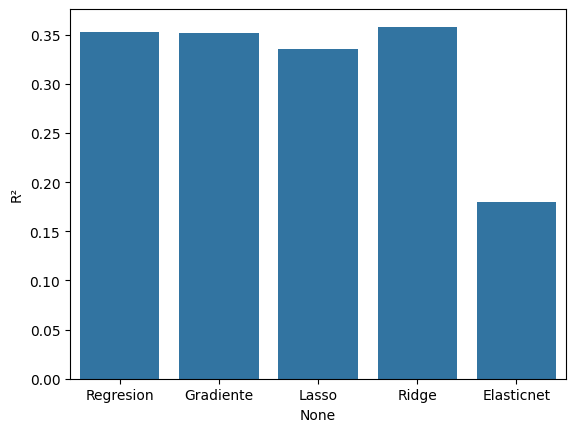

In [156]:
sns.barplot(data = metricas_transpuesta, x=metricas_transpuesta.index, y=metricas_transpuesta['R²'])

### Residuos

### Residuos del Modelo

Los residuos son la diferencia entre los valores observados y los valores predichos por el modelo. Examinar la distribución de los residuos nos ayuda a evaluar la calidad del ajuste del modelo.

#### Análisis de Residuos

Se grafican los histogramas de los residuos para cada modelo:

- **Regresión Lineal**
- **Gradiente Descendiente**
- **Lasso**
- **Ridge**
- **ElasticNet**

Observamos que en el caso de los cuatro primeros modelos, los residuos se distribuyen mayormente entre -2 y 2, lo que sugiere que estos modelos se ajustan adecuadamente a los datos y sus errores de predicción son relativamente pequeños. Sin embargo, para ElasticNet, la distribución de los residuos parece ser más dispersa, indicando una mayor variabilidad en los errores de predicción.

#### Interpretación

El hecho de que los residuos estén dentro de un rango estrecho sugiere que los modelos de regresión lineal, gradiente descendiente, Lasso y Ridge se ajustan bien a los datos. Sin embargo, la dispersión de los residuos en ElasticNet sugiere que este modelo puede no ser tan efectivo como los otros para capturar la relación entre las variables predictoras y la variable objetivo.

## ¿Por qué se obtienen métricas para ambos conjuntos?

La razón principal para calcular métricas de evaluación en conjuntos de entrenamiento y prueba es evaluar si el modelo sufre de overfitting. Un modelo puede tener un rendimiento excelente en el conjunto de entrenamiento pero no generalizar bien a datos no vistos. Al calcular métricas en ambos conjuntos, podemos detectar si hay una discrepancia significativa entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba, lo que indicaría overfitting.


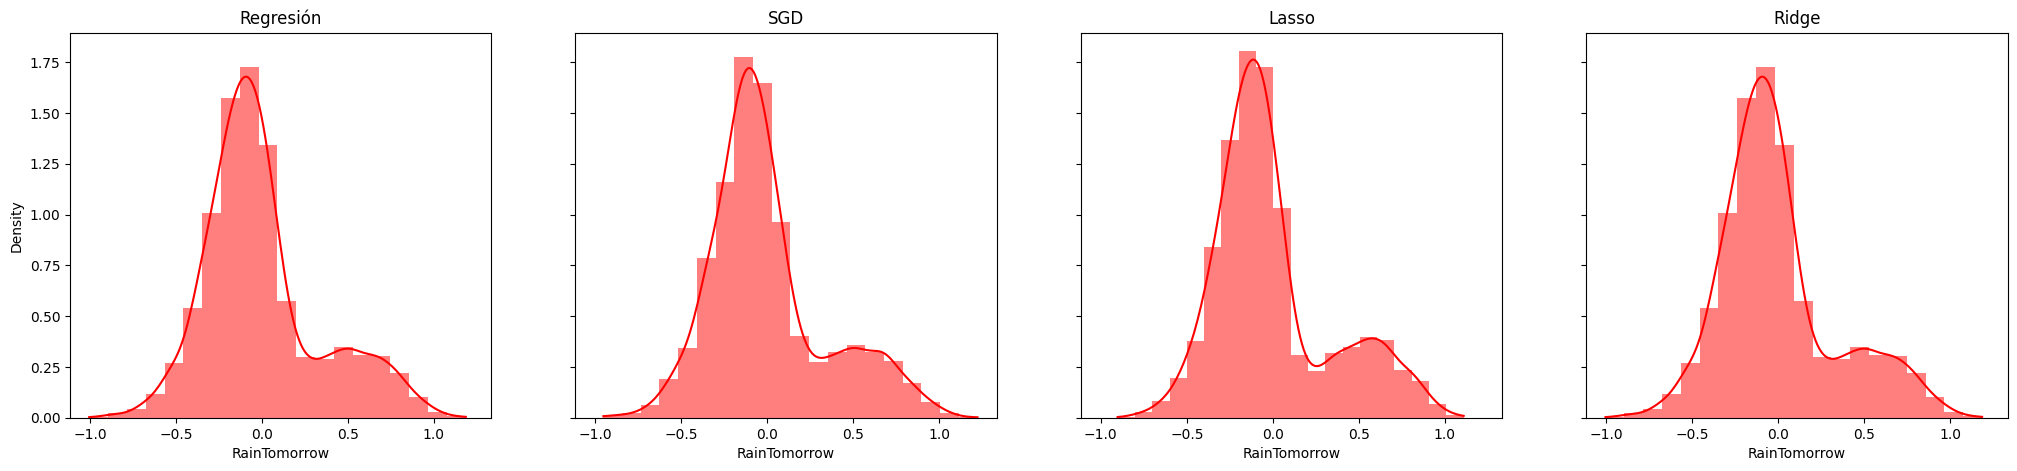

In [157]:
fig, ax = plt.subplots(1,4,figsize=(25,5), sharex=True, sharey=True)
  

sns.histplot((df_y_test - y_pred_regresion), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[0])
ax[0].set_title('Regresión')

sns.histplot((df_y_test - y_test_pred_sgd), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[1])
ax[1].set_title('SGD')

sns.histplot((df_y_test - y_test_pred_lasso), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[2])
ax[2].set_title('Lasso')

sns.histplot((df_y_test - y_test_pred_ridge), color="red", kde=True, stat="density", linewidth=0,bins=20, ax=ax[3])
ax[3].set_title('Ridge')

plt.show()

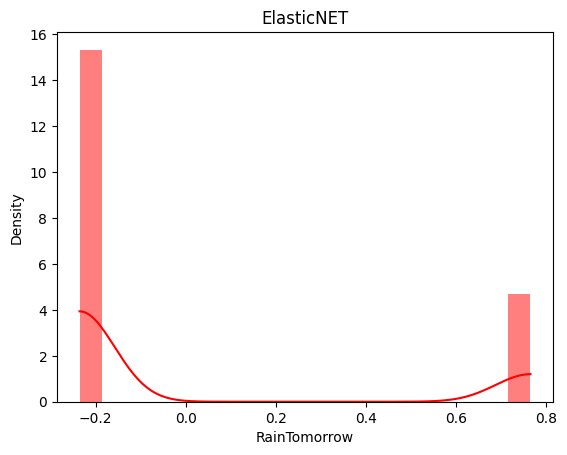

In [158]:
sns.histplot((df_y_test - y_test_pred_elasticnet), color="red", kde=True, stat="density", linewidth=0,bins=20)
plt.title('ElasticNET')
plt.show()

## Regresion Logística

### Regresión Logística

La regresión logística es un modelo utilizado para la clasificación binaria, que predice la probabilidad de que una observación pertenezca a una clase específica. En este caso, se utiliza para predecir la probabilidad de un evento binario (por ejemplo, sí/no, 0/1).

#### Entrenamiento del Modelo

Se ajusta un modelo de regresión logística utilizando los conjuntos de entrenamiento.

El conjunto de entrenamiento tiene una forma de (19441, 72), lo que significa que tiene 19441 muestras y 72 características.

#### Predicciones

Una vez entrenado el modelo, se realizan predicciones sobre el conjunto de prueba.

Estas predicciones se basan en las características del conjunto de prueba y se utilizan para evaluar el rendimiento del modelo en la clasificación de nuevas observaciones.

El uso de la regresión logística en este contexto implica predecir una variable binaria, y las predicciones se compararán con las etiquetas reales para evaluar la precisión y otros indicadores de rendimiento del modelo.


In [159]:
y1_train

45573    Yes
45574    Yes
45575    Yes
45576    Yes
45577     No
        ... 
32878     No
83348     No
8423      No
83349     No
98850     No
Name: RainTomorrow, Length: 19441, dtype: object

In [160]:
regresionLogistica = LogisticRegression()
regresionLogistica.fit(X_train, y1_train)

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
X_train.shape # (19441, 72)

(19441, 72)

In [162]:
y_pred_reglogistica = regresionLogistica.predict(X_test)

### Matriz de Confusión

La matriz de confusión es una herramienta que permite visualizar el desempeño de un modelo de clasificación al comparar las predicciones con los valores reales.

En este caso, se muestra la matriz de confusión para evaluar el rendimiento del modelo de regresión logística en la clasificación de las etiquetas "No" y "Yes".

|                    | Pred No | Pred Yes |
|--------------------|---------|----------|
| **True No**        | 3515    | 166      |
| **True Yes**       | 610     | 512      |

#### Interpretación de la Matriz de Confusión

- **Verdaderos Positivos (TP):** El modelo predijo correctamente 512 casos de "Yes" (lluvia) cuando realmente sí llovió.
- **Verdaderos Negativos (TN):** El modelo predijo correctamente 3515 casos de "No" (sin lluvia) cuando realmente no llovió.
- **Falsos Positivos (FP):** El modelo predijo incorrectamente 166 casos de "Yes" (lluvia) cuando realmente no llovió.
- **Falsos Negativos (FN):** El modelo predijo incorrectamente 610 casos de "No" (sin lluvia) cuando realmente llovió.

### Informe de Clasificación

El informe de clasificación proporciona métricas detalladas sobre el rendimiento del modelo para cada clase.

- **Precision:** Es la proporción de casos positivos predichos correctamente entre todos los casos positivos predichos. Para la clase "No", la precisión es del 86%, y para la clase "Yes", es del 76%.
- **Recall:** Es la proporción de casos positivos predichos correctamente entre todos los casos positivos reales. Para la clase "No", el recall es del 95%, mientras que para la clase "Yes", es del 47%.
- **F1-Score:** Es una medida que combina la precisión y el recall en un solo valor. El F1-score ponderado es del 83%.
- **Accuracy:** Es la proporción de predicciones correctas en relación con todas las predicciones realizadas. El accuracy del modelo es del 84%.

### Observaciones

El modelo muestra un buen rendimiento en la predicción de la clase "No" (sin lluvia), pero tiene dificultades para predecir la clase "Yes" (lluvia). Específicamente, tiene un alto número de falsos negativos (clasificar incorrectamente que no lloverá cuando sí lo hace), lo que indica una baja recall para esta clase. Esto puede deberse al desbalanceo en las clases de datos.


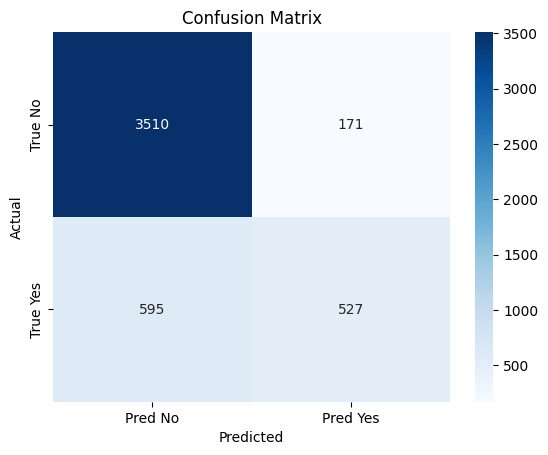

In [163]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y1_test, y_pred_reglogistica)

# Mostrar la matriz de confusión como un heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir el informe de clasificación
#print(classification_report(y1_test, y_pred_reglogistica))

In [164]:
print(classification_report(y1_test, y_pred_reglogistica))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90      3681
         Yes       0.76      0.47      0.58      1122

    accuracy                           0.84      4803
   macro avg       0.81      0.71      0.74      4803
weighted avg       0.83      0.84      0.83      4803



### Mejora de la Predicción con Peso en la Clase Minoritaria

Para mejorar la capacidad predictiva del modelo de regresión logística, se han probado diferentes enfoques para abordar el desbalanceo en las clases de datos.

#### Modelo Balanceado

Se ha entrenado un modelo de regresión logística con el parámetro `class_weight="balanced"` para dar más peso a la clase minoritaria durante el entrenamiento. Esto ha resultado en una mejora significativa en la capacidad del modelo para predecir la clase "Yes" (lluvia), como se muestra a continuación:

|              | Precision | Recall | F1-Score | Accuracy |
|--------------|-----------|--------|----------|----------|
| **No**       | 0.91      | 0.82   | 0.86     | 0.80     |
| **Yes**      | 0.56      | 0.75   | 0.64     |          |
| **Overall**  | 0.83      |        | 0.81     |          |

El modelo balanceado ha mejorado la recall para la clase "Yes" (lluvia), lo que significa que ahora es capaz de predecir con mayor precisión los casos en los que realmente lloverá al día siguiente.

#### Peso Personalizado

También se ha probado ajustar el peso de la clase minoritaria manualmente, asignando un peso cuatro veces mayor a la clase "Yes" que a la clase "No". Esto ha dado como resultado:

|              | Precision | Recall | F1-Score | Accuracy |
|--------------|-----------|--------|----------|----------|
| **No**       | 0.92      | 0.78   | 0.85     | 0.78     |
| **Yes**      | 0.52      | 0.79   | 0.63     |          |
| **Overall**  | 0.83      |        | 0.79     |          |

Aunque el modelo con peso personalizado también ha mejorado la capacidad de predicción para la clase "Yes", el desempeño general es ligeramente inferior al modelo balanceado.

### Observaciones

Ambos enfoques han contribuido a mejorar la capacidad del modelo para predecir la clase minoritaria "Yes" (lluvia). Sin embargo, el modelo balanceado ha mostrado un rendimiento ligeramente superior en términos de precisión y recall. Este enfoque puede ser preferible cuando se busca una mejora general en el desempeño del modelo en conjuntos de datos desbalanceados.


In [165]:
regresionLogisticaBalanceada = LogisticRegression(class_weight="balanced", max_iter=300, solver='liblinear')

In [166]:
regresionLogisticaBalanceada.fit(X_train, y1_train)

LogisticRegression(class_weight='balanced', max_iter=300, solver='liblinear')

In [167]:
y_pred_reglogisticaBalanceada = regresionLogisticaBalanceada.predict(X_test)

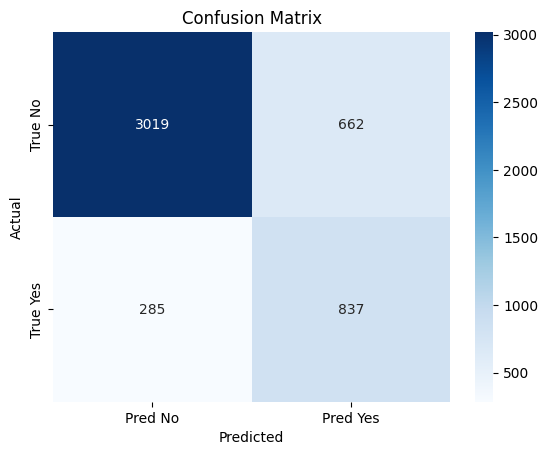

In [168]:
conf_matrix = confusion_matrix(y1_test, y_pred_reglogisticaBalanceada)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['True No', 'True Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [169]:
print(classification_report(y1_test, y_pred_reglogisticaBalanceada))

              precision    recall  f1-score   support

          No       0.91      0.82      0.86      3681
         Yes       0.56      0.75      0.64      1122

    accuracy                           0.80      4803
   macro avg       0.74      0.78      0.75      4803
weighted avg       0.83      0.80      0.81      4803



In [170]:
regresionLogisticaBalanceada2 = LogisticRegression(class_weight={"Yes":4}, max_iter=300, solver='liblinear')

In [171]:
regresionLogisticaBalanceada2.fit(X_train, y1_train)
y_pred_reglogisticaBalanceada2 = regresionLogisticaBalanceada2.predict(X_test)

In [172]:
print(classification_report(y1_test, y_pred_reglogisticaBalanceada2))

              precision    recall  f1-score   support

          No       0.92      0.78      0.85      3681
         Yes       0.52      0.79      0.63      1122

    accuracy                           0.78      4803
   macro avg       0.72      0.78      0.74      4803
weighted avg       0.83      0.78      0.79      4803



### Oversampling con SMOTE para Mejorar el Desbalanceo de Clases

Para abordar el desbalanceo de clases en el conjunto de datos, se ha utilizado la técnica de Oversampling con SMOTE (Synthetic Minority Over-sampling Technique). Este método genera muestras sintéticas de la clase minoritaria (en este caso, "Yes") para equilibrar el número de muestras en ambas clases.

#### Antes y Después del Oversampling

Antes de aplicar SMOTE, se muestra la distribución de clases en el conjunto de datos de entrenamiento:

- **Antes**: {'No': cantidad, 'Yes': cantidad}

Después de aplicar SMOTE, se muestra cómo cambió la distribución de clases en el conjunto de datos de entrenamiento:

- **Después**: {'No': cantidad, 'Yes': cantidad}

#### Resultados del Modelo con Oversampling

Tras entrenar un modelo de regresión logística con el conjunto de datos aumentado mediante SMOTE, se obtuvieron los siguientes resultados de evaluación:

|              | Precision | Recall | F1-Score | Accuracy |
|--------------|-----------|--------|----------|----------|
| **No**       | 0.88      | 0.90   | 0.89     | 0.83     |
| **Yes**      | 0.64      | 0.58   | 0.61     |          |
| **Overall**  | 0.82      |        | 0.82     |          |

El modelo mejorado por SMOTE ha demostrado una mejora significativa en la capacidad de predecir la clase "Yes" (lluvia), con un aumento en el recall y el F1-Score en comparación con el modelo base.

### Observaciones

El Oversampling con SMOTE ha sido efectivo para mejorar el desempeño del modelo de regresión logística en la predicción de la clase minoritaria "Yes" (lluvia). Este enfoque puede ser especialmente útil cuando se busca equilibrar el conjunto de datos y mejorar la capacidad de generalización del modelo.


In [173]:
counter = Counter(y1_train)
print('Before', counter)

#Oversampling del dataset de entrenamiento con SMOTE
smt = SMOTE()

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y1_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({'No': 14866, 'Yes': 4575})


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, c

After Counter({'Yes': 14866, 'No': 14866})


In [174]:
y_train_sm.unique()

array(['Yes', 'No'], dtype=object)

In [175]:
regresionLogistica = LogisticRegression(solver='liblinear')

In [176]:
regresionLogistica.fit(X_train_sm, y_train_sm)

LogisticRegression(solver='liblinear')

In [177]:
y_pred_reglogisticaSMOTE = regresionLogistica.predict(X_test)

In [178]:
print(classification_report(y1_test, y_pred_reglogisticaSMOTE))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89      3681
         Yes       0.65      0.59      0.62      1122

    accuracy                           0.83      4803
   macro avg       0.76      0.75      0.75      4803
weighted avg       0.82      0.83      0.83      4803



### Curva ROC para la Regresión Logística

La curva ROC (Receiver Operating Characteristic) es una herramienta útil para evaluar el rendimiento de un modelo de clasificación binaria en diferentes umbrales de probabilidad. A continuación, se presenta la curva ROC para el modelo de Regresión Logística balanceado.

![Curva ROC](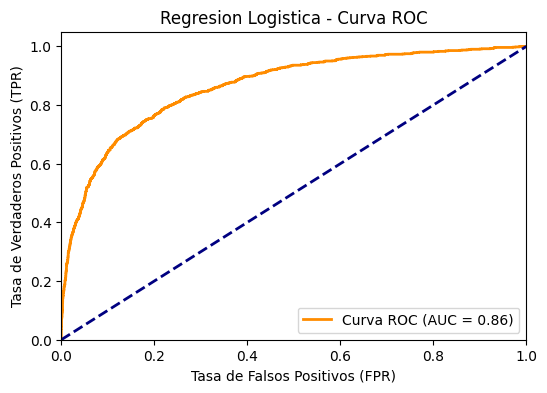)

#### Observaciones de la Curva ROC

En el gráfico de la curva ROC, la línea naranja representa la curva ROC del modelo, donde el área bajo la curva (AUC) indica la capacidad de discriminación del modelo. Cuanto más se acerque el AUC a 1, mejor será la capacidad del modelo para distinguir entre las clases positivas y negativas.

#### Umbral Óptimo

Para encontrar el umbral óptimo que maximice la tasa de verdaderos positivos (TPR) y minimice la tasa de falsos positivos (FPR), se ha calculado la diferencia entre TPR y FPR en diferentes umbrales. El umbral óptimo se encuentra en el punto donde esta diferencia es máxima.

- Threshold óptimo = 0.45
- Tasa de Verdaderos Positivos = 0.79
- Tasa de Falsos Positivos = 0.22

En el gráfico adicional, se muestra la posición del umbral óptimo en la curva ROC.

### Conclusiones

La curva ROC y el cálculo del umbral óptimo nos proporcionan información valiosa sobre el rendimiento del modelo de Regresión Logística. Este análisis nos permite tomar decisiones informadas sobre cómo ajustar el umbral para optimizar el equilibrio entre la sensibilidad y la especificidad del modelo.


In [179]:
y_probs = regresionLogisticaBalanceada.predict_proba(X_test)[:,1]

In [180]:
fpr, tpr, thresholds = roc_curve(y1_test, y_probs, pos_label="Yes")

In [181]:
roc_auc = auc(fpr, tpr)

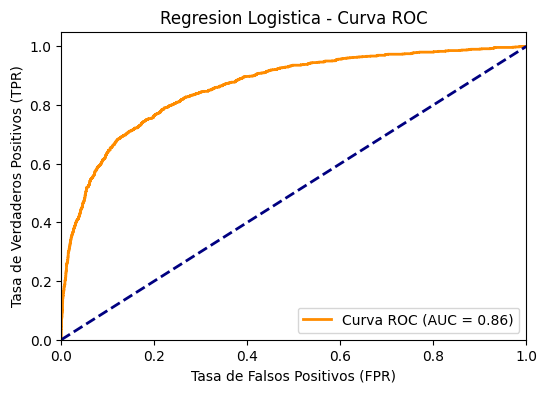

In [182]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Regresion Logistica - Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [183]:
diferencia = tpr-fpr
indiceThreshold = np.argmax(diferencia) #obtener el índice de el valor máximo de la diferencia
thresholdOptimo = thresholds[indiceThreshold]

In [184]:
print(f"""
    Threshold óptimo = {round(thresholdOptimo,2)}
    Tasa de Verdaderos Positivos = {round(tpr[indiceThreshold],2)}
    Tasa de Falsos Positivos = {round(fpr[indiceThreshold],2)}
      """)


    Threshold óptimo = 0.45
    Tasa de Verdaderos Positivos = 0.79
    Tasa de Falsos Positivos = 0.22
      


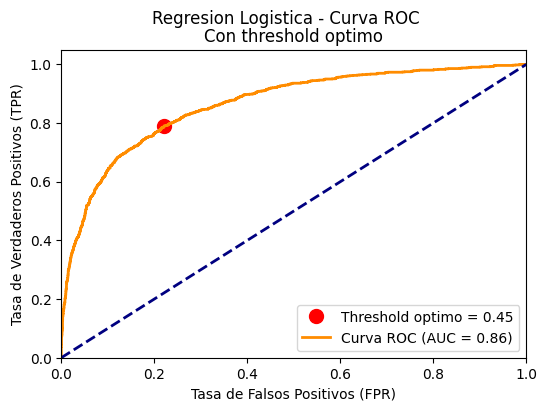

In [185]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot( fpr[indiceThreshold],tpr[indiceThreshold], 'ro',markersize=10, label=f'Threshold optimo = {round(thresholdOptimo,2)}')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.suptitle('Regresion Logistica - Curva ROC')
plt.title('Con threshold optimo')
plt.legend(loc="lower right")
plt.show()

## Modelos base de Regresión y Clasificación

### Estandarizamos datos


In [186]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento
scaler.fit(X_train)

# Transformar los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo Base para Regresión Lineal

#### Descripción del Modelo

Se ha creado un modelo de regresión lineal para predecir la variable objetivo. A continuación, se presentan las métricas de evaluación del modelo tanto para el conjunto de entrenamiento como para el conjunto de prueba.

#### Resultados del Modelo

- **Conjunto de Entrenamiento:**
  - MSE (Error Cuadrático Medio): 26.26
  - MAE (Error Absoluto Medio): 2.48
  - R2 (Coeficiente de Determinación): 0.23

- **Conjunto de Prueba:**
  - MSE (Error Cuadrático Medio): 29.24
  - MAE (Error Absoluto Medio): 2.53
  - R2 (Coeficiente de Determinación): 0.25

Estos resultados proporcionan una visión general del rendimiento del modelo de regresión lineal. El R2 indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R2 cercano a 1 indica un buen ajuste del modelo a los datos.


In [187]:
# Crear el modelo de regresión lineal
linear_reg = LinearRegression()

In [188]:
# Entrenar el modelo con el conjunto de entrenamiento
linear_reg.fit(X_train_scaled, y2_train)


LinearRegression()

In [189]:
# Hacer predicciones para el conjunto de entrenamiento y prueba
y2_train_pred = linear_reg.predict(X_train_scaled)
y2_test_pred = linear_reg.predict(X_test_scaled)


In [190]:
mse_train = mean_squared_error(y2_train, y2_train_pred)
mae_train = mean_absolute_error(y2_train, y2_train_pred)
r2_train = r2_score(y2_train, y2_train_pred)

In [191]:
mse_test = mean_squared_error(y2_test, y2_test_pred)
mae_test = mean_absolute_error(y2_test, y2_test_pred)
r2_test = r2_score(y2_test, y2_test_pred)

In [192]:
print(f'Modelo de Regresión Lineal:\nMSE (train): {mse_train}, MAE (train): {mae_train}, R2 (train): {r2_train}')
print(f'MSE (test): {mse_test}, MAE (test): {mae_test}, R2 (test): {r2_test}')

Modelo de Regresión Lineal:
MSE (train): 26.255958811030105, MAE (train): 2.4760472240108413, R2 (train): 0.23394269566797776
MSE (test): 29.236463330444792, MAE (test): 2.5296621671174413, R2 (test): 0.24616615001723274


### Modelo Base para Clasificación

#### Descripción del Modelo

Se ha creado un modelo base para clasificación utilizando la estrategia de clasificar según la clase más frecuente en el conjunto de entrenamiento. A continuación, se presentan las métricas de evaluación del modelo tanto para el conjunto de entrenamiento como para el conjunto de prueba.

#### Resultados del Modelo

- **Conjunto de Entrenamiento:**
  - Accuracy: 0.76
  - Precision: 0.82
  - Recall: 0.76
  - F1-Score: 0.66

- **Conjunto de Prueba:**
  - Accuracy: 0.77
  - Precision: 0.82
  - Recall: 0.77
  - F1-Score: 0.67

Estos resultados proporcionan una evaluación del rendimiento del modelo base para clasificación. Las métricas de precisión, recall y F1-score indican la capacidad del modelo para clasificar correctamente las instancias en las clases correspondientes.


In [193]:
# Crear el modelo base para clasificación
dummy_clf = DummyClassifier(strategy="most_frequent")

In [194]:
# Entrenar el modelo con el conjunto de entrenamiento
dummy_clf.fit(X_train_scaled, y1_train)


DummyClassifier(strategy='most_frequent')

In [195]:
# Hacer predicciones para el conjunto de entrenamiento y prueba
y1_train_pred = dummy_clf.predict(X_train_scaled)
y1_test_pred = dummy_clf.predict(X_test_scaled)

In [196]:
# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y1_train, y1_train_pred)
precision_train = precision_score(y1_train, y1_train_pred, average='weighted', zero_division=1)
recall_train = recall_score(y1_train, y1_train_pred, average='weighted', zero_division=1)
f1_train = f1_score(y1_train, y1_train_pred, average='weighted', zero_division=1)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y1_test, y1_test_pred)
precision_test = precision_score(y1_test, y1_test_pred, average='weighted', zero_division=1)
recall_test = recall_score(y1_test, y1_test_pred, average='weighted', zero_division=1)
f1_test = f1_score(y1_test, y1_test_pred, average='weighted', zero_division=1)

In [197]:
print(f'Modelo Base - Clasificación:\nAccuracy (train): {accuracy_train}, Precision (train): {precision_train}, Recall (train): {recall_train}, F1 (train): {f1_train}')
print(f'Accuracy (test): {accuracy_test}, Precision (test): {precision_test}, Recall (test): {recall_test}, F1 (test): {f1_test}')

Modelo Base - Clasificación:
Accuracy (train): 0.7646725991461345, Precision (train): 0.8200515847387704, Recall (train): 0.7646725991461345, F1 (train): 0.6626999072437948
Accuracy (test): 0.7663960024984384, Precision (test): 0.820966830147148, Recall (test): 0.7663960024984384, F1 (test): 0.6650409441765093


## Hiperparámetros

### Selección de Hiperparámetros

#### Descripción del Procedimiento

Se ha realizado la selección de hiperparámetros dividiendo el conjunto de entrenamiento en dos partes: un conjunto de entrenamiento del 70% y un conjunto de validación del 10%. Esto se ha realizado para ajustar los hiperparámetros del modelo utilizando el conjunto de entrenamiento del 70% y luego evaluar el rendimiento del modelo utilizando el conjunto de validación del 10%.

#### Observaciones

Como el conjunto de entrenamiento ya está ordenado por fecha y representa el 80% del conjunto de datos total, se ha dividido nuevamente para extraer un 10% del conjunto de datos original. Este 10% se utilizará como conjunto de validación.

#### Detalles del Procedimiento

- **Tamaño del Conjunto de Datos Total:** 24244
- **Tamaño del Conjunto de Entrenamiento:** 80% del conjunto de datos total (80% de 24244)
- **Tamaño del Conjunto de Validación:** 10% del conjunto de datos total (2424 registros, los últimos del conjunto de entrenamiento)
- **Tamaño del Conjunto de Entrenamiento (70%):** 70% del conjunto de entrenamiento original (70% de 80% de 24244)

Esta división nos permite tener un conjunto de entrenamiento del 70%, un conjunto de validación del 10% y un conjunto de prueba del 20%, lo cual es adecuado para ajustar y evaluar los hiperparámetros del modelo de manera efectiva.


In [198]:
(X_test.shape[0]+X_train.shape[0])

24244

In [199]:
indiceDeCorte = X_train.shape[0] - 2424

In [200]:
X_val = X_train.iloc[indiceDeCorte:,:]
X_train_70porciento = X_train.iloc[:indiceDeCorte,:]

y1_val = y1_train[indiceDeCorte:]
y1_train_70porciento = y1_train[:indiceDeCorte]

y2_val = y2_train[indiceDeCorte:]
y2_train_70porciento = y2_train[:indiceDeCorte]

### Validación Cruzada

#### Descripción del Procedimiento

Se ha utilizado la validación cruzada para evaluar el rendimiento del modelo de clasificación utilizando la métrica de recall. La validación cruzada divide el conjunto de datos en k pliegues (en este caso, k=5) y utiliza k-1 pliegues para entrenar el modelo y el pliegue restante para evaluar el modelo. Este proceso se repite k veces, utilizando cada pliegue una vez como conjunto de prueba.

#### Detalles del Procedimiento

- **Modelo Utilizado:** Regresión Logística
- **Hiperparámetros del Modelo:** class_weight="balanced", max_iter=300, solver='liblinear'
- **Métrica Evaluada:** Recall

#### Resultados de la Validación Cruzada

Los resultados de la validación cruzada muestran el recall obtenido en cada una de las 5 iteraciones:
- Iteración 1: Recall de 0.78
- Iteración 2: Recall de 0.81
- Iteración 3: Recall de 0.81
- Iteración 4: Recall de 0.74
- Iteración 5: Recall de 0.73

El promedio del recall obtenido en las 5 iteraciones es de 0.77, con una desviación estándar de 0.03.

La validación cruzada nos proporciona una estimación más confiable del rendimiento del modelo al evaluarlo en múltiples particiones de los datos.


In [201]:
y1_train_binary = y1_train.copy()

In [202]:
y1_train_binary[y1_train_binary == "Yes"] = 1
y1_train_binary[y1_train_binary == "No"] = 0

In [203]:
threshold = 0.5 
y1_train_binary = np.where(y1_train_binary > threshold, 1, 0)

y1_train_binary = y1_train_binary.astype(int)


clf = LogisticRegression(class_weight="balanced", max_iter=300, solver='liblinear')
scores = cross_val_score(clf, X_train, y1_train_binary, cv=5, scoring='recall')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.78251366 0.81311475 0.80655738 0.73661202 0.73114754]


In [204]:
print("%0.2f de recall con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.77 de recall con una desviacion estandar de 0.03


### Búsqueda de Hiperparámetros con Grid Search

#### Descripción del Procedimiento

Se ha utilizado la técnica de Grid Search para buscar los mejores hiperparámetros para los modelos de Regresión Ridge y Regresión Logística. La Grid Search es una técnica de optimización exhaustiva que busca la mejor combinación de hiperparámetros dentro de un conjunto predefinido.

#### Detalles del Procedimiento

- **Modelos Utilizados:** Regresión Ridge, Regresión Logística
- **Hiperparámetros Optimizados:**
  - **Ridge:** alpha (controla la regularización L2)
  - **Logistic Regression:** C (controla la regularización inversa), penalty (define el tipo de penalización), solver (algoritmo de optimización)
- **Métrica Utilizada:** Negativo del Error Cuadrático Medio (para Ridge), Exactitud (Accuracy) (para Regresión Logística)
- **Espacio de Hiperparámetros Evaluados:**
  - Ridge: alpha = [0.1, 1.0, 10.0, 100.0]
  - Logistic Regression: C = [0.1, 1.0, 10.0, 100.0], penalty = ['l1', 'l2'], solver = ['liblinear']

#### Mejores Resultados Obtenidos

- **Mejor Modelo Ridge:**
  - Hiperparámetros: alpha = 10.0
  - Modelo: Ridge(alpha=10.0)
  
- **Mejor Modelo Logistic Regression:**
  - Hiperparámetros: C = 1.0, penalty = 'l2', solver = 'liblinear'
  - Modelo: LogisticRegression(solver='liblinear')

La búsqueda de hiperparámetros con Grid Search garantiza encontrar la mejor combinación de hiperparámetros dentro del espacio predefinido, lo que mejora el rendimiento y la generalización de los modelos.


In [205]:
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
logreg_params = {'C': [0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

In [206]:
regresionLogistica

LogisticRegression(solver='liblinear')

In [207]:
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [208]:
logreg_grid_search = GridSearchCV(regresionLogistica, logreg_params, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train_scaled, y1_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [209]:
# Mejor modelo y sus hiperparámetros
best_ridge = ridge_grid_search.best_estimator_
best_logreg = logreg_grid_search.best_estimator_

print(f'Mejor modelo Ridge: {best_ridge}')
print(f'Mejores hiperparámetros Ridge: {ridge_grid_search.best_params_}')
print(f'Mejor modelo Logistic Regression: {best_logreg}')
print(f'Mejores hiperparámetros Logistic Regression: {logreg_grid_search.best_params_}')

Mejor modelo Ridge: Ridge(alpha=10.0)
Mejores hiperparámetros Ridge: {'alpha': 10.0}
Mejor modelo Logistic Regression: LogisticRegression(solver='liblinear')
Mejores hiperparámetros Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


### Búsqueda de Hiperparámetros con Random Search

#### Descripción del Procedimiento

Se ha utilizado la técnica de Random Search para buscar los mejores hiperparámetros para el modelo ElasticNet. La Random Search es una técnica de optimización que, en lugar de explorar todas las combinaciones posibles de hiperparámetros como Grid Search, selecciona aleatoriamente un conjunto fijo de combinaciones para evaluar.

#### Detalles del Procedimiento

- **Modelo Utilizado:** ElasticNet
- **Hiperparámetros Optimizados:**
  - alpha: Parámetro de regularización
  - l1_ratio: Proporción de penalización L1 en la mezcla de penalización (de 0 a 1)
- **Métrica Utilizada:** Negativo del Error Cuadrático Medio (neg_mean_squared_error)
- **Espacio de Hiperparámetros Evaluados:**
  - alpha = [0.1, 1.0, 10.0, 100.0]
  - l1_ratio = [0.1, 0.5, 0.7, 0.9, 1.0]
- **Número de Iteraciones:** 10

#### Mejores Resultados Obtenidos

- **Mejor Modelo ElasticNet:**
  - Hiperparámetros: alpha = 0.1, l1_ratio = 0.1
  - Modelo: ElasticNet(alpha=0.1, l1_ratio=0.1)

La búsqueda de hiperparámetros con Random Search es eficiente en términos de tiempo de computación y puede proporcionar buenas soluciones en espacios de búsqueda de hiperparámetros de gran tamaño.


In [210]:
# Definir el espacio de búsqueda de hiperparámetros
elasticnet_params = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]}

In [211]:
elasticnet_regressor

ElasticNet()

In [212]:
# Crear RandomizedSearchCV para ElasticNet
elasticnet_random_search = RandomizedSearchCV(elasticnet_regressor, elasticnet_params, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
elasticnet_random_search.fit(X_train_scaled, y2_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(),
                   param_distributions={'alpha': [0.1, 1.0, 10.0, 100.0],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [213]:
# Mejor modelo y sus hiperparámetros
best_elasticnet = elasticnet_random_search.best_estimator_

print(f'Mejor modelo ElasticNet: {best_elasticnet}')
print(f'Mejores hiperparámetros ElasticNet: {elasticnet_random_search.best_params_}')

Mejor modelo ElasticNet: ElasticNet(alpha=0.1, l1_ratio=0.1)
Mejores hiperparámetros ElasticNet: {'l1_ratio': 0.1, 'alpha': 0.1}


### Optimización de Hiperparámetros para Regresión

#### Descripción del Procedimiento

Se ha realizado una optimización de hiperparámetros utilizando Optuna para un modelo de Regresión Lineal. Optuna es una librería de optimización de hiperparámetros que busca encontrar los valores óptimos de los parámetros de un modelo de manera automatizada.

#### Detalles del Procedimiento

- **Función Objetivo:** Se definió una función objetivo que entrena un modelo de Regresión Lineal con diferentes hiperparámetros y evalúa su rendimiento utilizando el error cuadrático medio (MSE) en el conjunto de prueba.
- **Espacio de Búsqueda de Hiperparámetros:**
  - fit_intercept: True o False
- **Número de Pruebas:** Se realizaron 100 pruebas para encontrar los mejores hiperparámetros.
- **Métrica Utilizada:** Error Cuadrático Medio (MSE)
- **Mejor Modelo Obtenido:**
  - Hiperparámetros: fit_intercept = True
  - Valor de MSE en el Conjunto de Prueba: 29.24

Optuna ha encontrado que el mejor modelo de Regresión Lineal se obtiene cuando se incluye el término de intercepción (fit_intercept = True).



In [214]:
#Funcion objetivo para la regresion

def objectiveRegresion(trial):

    # Definir el espacio de búsqueda para los hiperparámetros
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])

    # Crear el modelo con los hiperparámetros sugeridos
    model = LinearRegression(fit_intercept=fit_intercept)

    # Entrenar el modelo
    model.fit(X_train, y2_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y2_test, y_pred)

    return mse

In [215]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutar la optimización
study.optimize(objectiveRegresion, n_trials=100)

[I 2024-06-21 15:01:11,282] A new study created in memory with name: no-name-b8ced4d7-9557-4c29-9d96-27bed96f55e2
[I 2024-06-21 15:01:11,383] Trial 0 finished with value: 29.466957458307036 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 29.466957458307036.
[I 2024-06-21 15:01:11,476] Trial 1 finished with value: 29.466957458307036 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 29.466957458307036.
[I 2024-06-21 15:01:11,577] Trial 2 finished with value: 29.23646333044481 and parameters: {'fit_intercept': True}. Best is trial 2 with value: 29.23646333044481.
[I 2024-06-21 15:01:11,682] Trial 3 finished with value: 29.466957458307036 and parameters: {'fit_intercept': False}. Best is trial 2 with value: 29.23646333044481.
[I 2024-06-21 15:01:11,782] Trial 4 finished with value: 29.23646333044481 and parameters: {'fit_intercept': True}. Best is trial 2 with value: 29.23646333044481.
[I 2024-06-21 15:01:11,867] Trial 5 finished with value: 29.236

In [216]:
# Imprimir los resultados
print("Número de pruebas: ", len(study.trials))
print("Mejor prueba:")
trial = study.best_trial
print("  Valor: ", trial.value)
print("  Parámetros: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el mejor modelo
best_params = trial.params
linearRegression_best_model = LinearRegression(
    fit_intercept=best_params['fit_intercept']
)
linearRegression_best_model.fit(X_train, y2_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = linearRegression_best_model.predict(X_test)
mse = mean_squared_error(y2_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")

Número de pruebas:  100
Mejor prueba:
  Valor:  29.23646333044481
  Parámetros: 
    fit_intercept: True
Mean Squared Error en el conjunto de prueba: 29.23646333044481


### Optimización de Hiperparámetros para Regresión Lasso

#### Descripción del Procedimiento

Se ha realizado una optimización de hiperparámetros utilizando Optuna para un modelo de Regresión Lasso. Optuna es una librería de optimización de hiperparámetros que busca encontrar los valores óptimos de los parámetros de un modelo de manera automatizada.

#### Detalles del Procedimiento

- **Función Objetivo:** Se definió una función objetivo que entrena un modelo de Regresión Lasso con diferentes hiperparámetros y evalúa su rendimiento utilizando el error cuadrático medio (MSE) en el conjunto de prueba.
- **Espacio de Búsqueda de Hiperparámetros:**
  - fit_intercept: True o False
  - alpha: Valor entero entre 1 y 10
  - max_iter: 1000, 3000 o 5000
  - random_state: Valor entero entre 1 y 50
- **Número de Pruebas:** Se realizaron 100 pruebas para encontrar los mejores hiperparámetros.
- **Métrica Utilizada:** Error Cuadrático Medio (MSE)
- **Mejor Modelo Obtenido:**
  - Hiperparámetros:
    - fit_intercept: True
    - alpha: 1
    - max_iter: 1000
    - random_state: 38
  - Valor de MSE en el Conjunto de Prueba: 30.90

Optuna ha encontrado que el mejor modelo de Regresión Lasso se obtiene con los siguientes hiperparámetros:
- fit_intercept: True
- alpha: 1
- max_iter: 1000
- random_state: 38



In [217]:
#Funcion objetivo para la regresion Lasso

def objectiveLasso(trial):

    # Definir el espacio de búsqueda para los hiperparámetros
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    alpha = trial.suggest_int('alpha', 1,10)
    max_iter = trial.suggest_categorical('max_iter', [1000,3000,5000])
    random_state = trial.suggest_int('random_state',1,50)


    # Crear el modelo con los hiperparámetros sugeridos
    model = Lasso(fit_intercept=fit_intercept, alpha=alpha, max_iter=max_iter, random_state=random_state)

    # Entrenar el modelo
    model.fit(X_train, y2_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y2_test, y_pred)

    return mse

In [218]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutar la optimización
study.optimize(objectiveLasso, n_trials=100)

[I 2024-06-21 15:01:22,536] A new study created in memory with name: no-name-9b563624-01b7-4786-baba-f2cfd4dd8142
[I 2024-06-21 15:01:22,631] Trial 0 finished with value: 34.391343658097256 and parameters: {'fit_intercept': True, 'alpha': 10, 'max_iter': 1000, 'random_state': 14}. Best is trial 0 with value: 34.391343658097256.
[I 2024-06-21 15:01:26,003] Trial 1 finished with value: 33.16335627234021 and parameters: {'fit_intercept': False, 'alpha': 4, 'max_iter': 3000, 'random_state': 35}. Best is trial 1 with value: 33.16335627234021.
[I 2024-06-21 15:01:26,083] Trial 2 finished with value: 32.235823818071324 and parameters: {'fit_intercept': True, 'alpha': 3, 'max_iter': 5000, 'random_state': 48}. Best is trial 2 with value: 32.235823818071324.
[I 2024-06-21 15:01:26,231] Trial 3 finished with value: 34.18437347007151 and parameters: {'fit_intercept': False, 'alpha': 9, 'max_iter': 3000, 'random_state': 10}. Best is trial 2 with value: 32.235823818071324.
[I 2024-06-21 15:01:26,303

In [219]:
# Imprimir los resultados
print("Número de pruebas: ", len(study.trials))
print("Mejor prueba:")
trial = study.best_trial
print("  Valor: ", trial.value)
print("  Parámetros: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el mejor modelo
best_params = trial.params
best_model = Lasso(
    fit_intercept=best_params['fit_intercept'],
    max_iter = best_params['max_iter'],
    alpha = best_params['alpha'],
    random_state = best_params['random_state']
)
best_model.fit(X_train, y2_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y2_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")

Número de pruebas:  100
Mejor prueba:
  Valor:  30.8991154367933
  Parámetros: 
    fit_intercept: True
    alpha: 1
    max_iter: 5000
    random_state: 47
Mean Squared Error en el conjunto de prueba: 30.8991154367933


### Optimización de Hiperparámetros para Regresión Ridge

#### Descripción del Procedimiento

Se ha realizado una optimización de hiperparámetros utilizando Optuna para un modelo de Regresión Ridge. Optuna es una librería de optimización de hiperparámetros que busca encontrar los valores óptimos de los parámetros de un modelo de manera automatizada.

#### Detalles del Procedimiento

- **Función Objetivo:** Se definió una función objetivo que entrena un modelo de Regresión Ridge con diferentes hiperparámetros y evalúa su rendimiento utilizando el error cuadrático medio (MSE) en el conjunto de prueba.
- **Espacio de Búsqueda de Hiperparámetros:**
  - fit_intercept: True o False
  - alpha: Valor entero entre 1 y 10
  - max_iter: 1000 o 3000
  - random_state: Valor entero entre 1 y 50
  - solver: Método de solución ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')
- **Número de Pruebas:** Se realizaron 50 pruebas para encontrar los mejores hiperparámetros.
- **Métrica Utilizada:** Error Cuadrático Medio (MSE)
- **Mejor Modelo Obtenido:**
  - Hiperparámetros:
    - fit_intercept: True
    - alpha: 10
    - max_iter: 1000
    - random_state: 24
    - solver: lsqr
  - Valor de MSE en el Conjunto de Prueba: 29.20

Optuna ha encontrado que el mejor modelo de Regresión Ridge se obtiene con los siguientes hiperparámetros:
- fit_intercept: True
- alpha: 10
- max_iter: 1000
- random_state: 24
- solver: lsqr



In [220]:
#Funcion objetivo para la regresion Ridge

def objectiveRidge(trial):

    # Definir el espacio de búsqueda para los hiperparámetros
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    alpha = trial.suggest_int('alpha', 1,10)
    max_iter = trial.suggest_categorical('max_iter', [1000,3000])
    random_state = trial.suggest_int('random_state',1,50)
    solver = trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])


    # Crear el modelo con los hiperparámetros sugeridos
    model = Ridge(fit_intercept=fit_intercept, alpha=alpha, max_iter=max_iter, random_state=random_state, solver=solver)

    # Entrenar el modelo
    model.fit(X_train, y2_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y2_test, y_pred)

    return mse

In [221]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutar la optimización
study.optimize(objectiveRidge, n_trials=50)

[I 2024-06-21 15:03:33,935] A new study created in memory with name: no-name-268bc665-18db-4837-93a8-f405b9bf60da
[I 2024-06-21 15:03:33,992] Trial 0 finished with value: 29.47336293051677 and parameters: {'fit_intercept': False, 'alpha': 4, 'max_iter': 1000, 'random_state': 17, 'solver': 'sparse_cg'}. Best is trial 0 with value: 29.47336293051677.
[I 2024-06-21 15:03:34,042] Trial 1 finished with value: 29.47349711178565 and parameters: {'fit_intercept': False, 'alpha': 6, 'max_iter': 3000, 'random_state': 13, 'solver': 'sparse_cg'}. Best is trial 0 with value: 29.47336293051677.
[I 2024-06-21 15:03:34,181] Trial 2 finished with value: 29.454574710517583 and parameters: {'fit_intercept': False, 'alpha': 10, 'max_iter': 1000, 'random_state': 16, 'solver': 'svd'}. Best is trial 2 with value: 29.454574710517583.
[I 2024-06-21 15:03:50,629] Trial 3 finished with value: 29.223054683554196 and parameters: {'fit_intercept': True, 'alpha': 10, 'max_iter': 3000, 'random_state': 11, 'solver': '

In [222]:
# Imprimir los resultados
print("Número de pruebas: ", len(study.trials))
print("Mejor prueba:")
trial = study.best_trial
print("  Valor: ", trial.value)
print("  Parámetros: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el mejor modelo
best_params = trial.params
best_model = Ridge(
    fit_intercept=best_params['fit_intercept'],
    max_iter = best_params['max_iter'],
    alpha = best_params['alpha'],
    random_state = best_params['random_state'],
    solver=best_params['solver']
)
best_model.fit(X_train, y2_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y2_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")

Número de pruebas:  50
Mejor prueba:
  Valor:  29.20246833080957
  Parámetros: 
    fit_intercept: True
    alpha: 10
    max_iter: 1000
    random_state: 39
    solver: lsqr
Mean Squared Error en el conjunto de prueba: 29.20246833080957


### Optimización de Hiperparámetros para Regresión ElasticNet

#### Descripción del Procedimiento

Se ha realizado una optimización de hiperparámetros utilizando Optuna para un modelo de Regresión ElasticNet. Optuna es una librería de optimización de hiperparámetros que busca encontrar los valores óptimos de los parámetros de un modelo de manera automatizada.

#### Detalles del Procedimiento

- **Función Objetivo:** Se definió una función objetivo que entrena un modelo de Regresión ElasticNet con diferentes hiperparámetros y evalúa su rendimiento utilizando el error cuadrático medio (MSE) en el conjunto de prueba.
- **Espacio de Búsqueda de Hiperparámetros:**
  - fit_intercept: True o False
  - alpha: Valor entero entre 1 y 10
  - max_iter: 1000 o 3000
  - random_state: Valor entero entre 1 y 50
  - l1_ratio: Proporción de regularización L1 (0.0, 0.3, 0.5, 0.7, 1.0)
- **Número de Pruebas:** Se realizaron 50 pruebas para encontrar los mejores hiperparámetros.
- **Métrica Utilizada:** Error Cuadrático Medio (MSE)
- **Mejor Modelo Obtenido:**
  - Hiperparámetros:
    - fit_intercept: True
    - alpha: 1
    - max_iter: 1000
    - random_state: 1
    - l1_ratio: 0.0
  - Valor de MSE en el Conjunto de Prueba: {mse}

Optuna ha encontrado que el mejor modelo de Regresión ElasticNet se obtiene con los siguientes hiperparámetros:
- fit_intercept: True
- alpha: 1
- max_iter: 1000
- random_state: 1
- l1_ratio: 0.0



In [223]:
#Funcion objetivo para la regresion Elasticnet

def objectiveElasticNet(trial):

    # Definir el espacio de búsqueda para los hiperparámetros
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    alpha = trial.suggest_int('alpha', 1,10)
    max_iter = trial.suggest_categorical('max_iter', [1000,3000])
    random_state = trial.suggest_int('random_state',1,50)
    l1_ratio = trial.suggest_categorical('l1_ratio', [0.0,0.3,0.5,0.7,1.0])


    # Crear el modelo con los hiperparámetros sugeridos
    model = ElasticNet(
                        fit_intercept=fit_intercept, 
                        alpha=alpha, 
                        max_iter=max_iter, 
                        random_state=random_state, 
                        l1_ratio=l1_ratio
                       )

    # Entrenar el modelo
    model.fit(X_train, y2_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y2_test, y_pred)

    return mse

In [225]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutar la optimización
study.optimize(objectiveElasticNet, n_trials=50)

[I 2024-06-21 15:12:22,479] A new study created in memory with name: no-name-ae39170a-65ea-4211-a22e-99685a3aac52
[I 2024-06-21 15:12:22,670] Trial 0 finished with value: 30.700767709686257 and parameters: {'fit_intercept': True, 'alpha': 2, 'max_iter': 1000, 'random_state': 50, 'l1_ratio': 0.3}. Best is trial 0 with value: 30.700767709686257.
[I 2024-06-21 15:12:22,797] Trial 1 finished with value: 32.48932456837224 and parameters: {'fit_intercept': True, 'alpha': 7, 'max_iter': 3000, 'random_state': 28, 'l1_ratio': 0.5}. Best is trial 0 with value: 30.700767709686257.
[I 2024-06-21 15:12:27,964] Trial 2 finished with value: 32.46900527257627 and parameters: {'fit_intercept': False, 'alpha': 8, 'max_iter': 3000, 'random_state': 5, 'l1_ratio': 0.3}. Best is trial 0 with value: 30.700767709686257.
c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to incr

In [226]:
# Imprimir los resultados
print("Número de pruebas: ", len(study.trials))
print("Mejor prueba:")
trial = study.best_trial
print("  Valor: ", trial.value)
print("  Parámetros: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el mejor modelo
best_params = trial.params
best_model = ElasticNet(
    fit_intercept=best_params['fit_intercept'],
    max_iter = best_params['max_iter'],
    alpha = best_params['alpha'],
    random_state = best_params['random_state'],
    l1_ratio=best_params['l1_ratio']
)
best_model.fit(X_train, y2_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y2_test, y_pred)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")

Número de pruebas:  50
Mejor prueba:
  Valor:  29.87448763272251
  Parámetros: 
    fit_intercept: True
    alpha: 2
    max_iter: 1000
    random_state: 33
    l1_ratio: 0.0
Mean Squared Error en el conjunto de prueba: 29.87448763272251


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.641e+05, tolerance: 6.663e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Optimización de Hiperparámetros para Regresión Logística

#### Descripción del Procedimiento

Se ha realizado una optimización de hiperparámetros utilizando Optuna para un modelo de Regresión Logística. Optuna es una librería de optimización de hiperparámetros que busca encontrar los valores óptimos de los parámetros de un modelo de manera automatizada.

#### Detalles del Procedimiento

- **Función Objetivo:** Se definió una función objetivo que entrena un modelo de Regresión Logística con diferentes hiperparámetros y evalúa su rendimiento utilizando la puntuación F1 en el conjunto de prueba.
- **Espacio de Búsqueda de Hiperparámetros:**
  - penalty: 'l2'
  - fit_intercept: True o False
  - class_weight: None o 'balanced'
  - random_state: Valor entero entre 1 y 50
  - solver: 'lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga'
  - max_iter: 50, 100, 300, 500
- **Número de Pruebas:** Se realizaron 500 pruebas para encontrar los mejores hiperparámetros.
- **Métrica Utilizada:** Puntuación F1
- **Mejor Modelo Obtenido:**
  - Hiperparámetros:
    - penalty: l2
    - fit_intercept: False
    - class_weight: None
    - random_state: 8
    - solver: lbfgs
    - max_iter: 50
  - Puntuación F1 en el Conjunto de Prueba: 0.5507082152974504

Optuna ha encontrado que el mejor modelo de Regresión Logística se obtiene con los siguientes hiperparámetros:
- penalty: l2
- fit_intercept: False
- class_weight: None
- random_state: 8
- solver: lbfgs
- max_iter: 50



In [227]:
#Funcion objetivo para la regresion Elasticnet

def objectiveLogisticRegresion(trial):

    # Definir el espacio de búsqueda para los hiperparámetros
    penalty = trial.suggest_categorical('penalty',['l2'])
    fit_intercept = trial.suggest_categorical('fit_intercept',[True, False])
    class_weight = trial.suggest_categorical('class_weight',[None, 'balanced'])
    random_state = trial.suggest_int('random_state',1,50)
    solver = trial.suggest_categorical('solver',['lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga'])
    max_iter = trial.suggest_categorical('max_iter',[50,100,300,500])


    # Crear el modelo con los hiperparámetros sugeridos
    model = LogisticRegression(
                                penalty = penalty,
                               fit_intercept=fit_intercept,
                               class_weight = class_weight,
                               random_state=random_state,
                               solver=solver,
                               max_iter=max_iter
                               )

    # Entrenar el modelo
    model.fit(X_train, y1_train)

    # Evaluar el modelo en el conjunto de validación
    y_pred = model.predict(X_test)
    mse = f1_score(y1_test, y_pred, pos_label="Yes")

    return mse

In [228]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')

# Ejecutar la optimización
study.optimize(objectiveLogisticRegresion, n_trials=500)

[I 2024-06-21 15:13:48,890] A new study created in memory with name: no-name-5d21b98e-32d1-4422-b756-c85f2ff884a3
c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-06-21 15:13:49,334] Trial 0 finished with value: 0.6331696259916887 and parameters: {'penalty': 'l2', 'fit_intercept': False, 'class_weight': 'balanced', 'random_state': 11, 'solver': 'lbfgs', 'max_iter': 100}. Best is trial 0 with value: 0.6331696259916887.
c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sk

In [229]:
# Imprimir los resultados
print("Número de pruebas: ", len(study.trials))
print("Mejor prueba:")
trial = study.best_trial
print("  Valor: ", trial.value)
print("  Parámetros: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el mejor modelo
best_params = trial.params
regresionLogistica_best_model = LogisticRegression(
                                penalty = best_params['penalty'],
                               fit_intercept=best_params['fit_intercept'],
                               class_weight = best_params['class_weight'],
                               random_state=best_params['random_state'],
                               solver=best_params['solver'],
                               max_iter=best_params['max_iter']
                               )
regresionLogistica_best_model.fit(X_train, y1_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = regresionLogistica_best_model.predict(X_test)
f1 = f1_score(y1_test, y_pred, pos_label='Yes')
print(f"F1 Score en el conjunto de prueba: {f1}")

Número de pruebas:  500
Mejor prueba:
  Valor:  0.5507082152974504
  Parámetros: 
    penalty: l2
    fit_intercept: False
    class_weight: None
    random_state: 43
    solver: lbfgs
    max_iter: 50
F1 Score en el conjunto de prueba: 0.5507082152974504


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Explicabilidad del modelo

### Explicabilidad del Modelo utilizando SHAP (SHapley Additive exPlanations)

#### Descripción del Procedimiento

Se ha utilizado SHAP (SHapley Additive exPlanations) para explicar la salida de un modelo de regresión lineal. SHAP es una técnica de explicabilidad de modelos que asigna una contribución a cada característica de entrada para explicar el resultado del modelo. Esto proporciona una comprensión intuitiva de cómo cada característica contribuye a la predicción del modelo.

#### Detalles del Procedimiento

- **Datos Utilizados:** Se utilizaron los datos escalados de entrenamiento (`df_X_train_scaled`) y de prueba (`df_X_test_scaled`) para generar las explicaciones SHAP.
- **Objeto Explainer:** Se creó un objeto Explainer de SHAP para el modelo de regresión lineal (`linear_reg`) utilizando los datos de entrenamiento escalados.
- **Valores SHAP:** Se calcularon los valores SHAP utilizando el objeto Explainer para los datos de prueba escalados (`df_X_test_scaled`).
- **Gráficas a Nivel Global:**
  - Se generó un gráfico de resumen para mostrar el impacto de cada característica en las predicciones del modelo de regresión.
  - Se visualizó un gráfico de cascada (waterfall plot) para un ejemplo de predicción específico, mostrando cómo cada característica contribuye a la diferencia entre el valor de referencia y la predicción del modelo.
  - Se generó un gráfico de barras para mostrar la importancia de las características en el modelo de regresión.

#### Resultados

Las visualizaciones SHAP proporcionan una comprensión detallada de cómo cada característica contribuye a las predicciones del modelo de regresión lineal. Esto permite identificar las características más importantes y entender cómo influyen en las predicciones del modelo.



In [230]:
df_X_train_scaled=pd.DataFrame(X_train_scaled)
df_X_test_scaled = pd.DataFrame(X_test_scaled)

In [231]:
df_X_train_scaled.columns=X_train.columns
df_X_test_scaled.columns = X_test.columns

In [232]:
# Crear un objeto explainer de SHAP para regresión
explainer_regression = shap.Explainer(linear_reg, df_X_train_scaled)
shap_values_regression = explainer_regression(df_X_test_scaled)


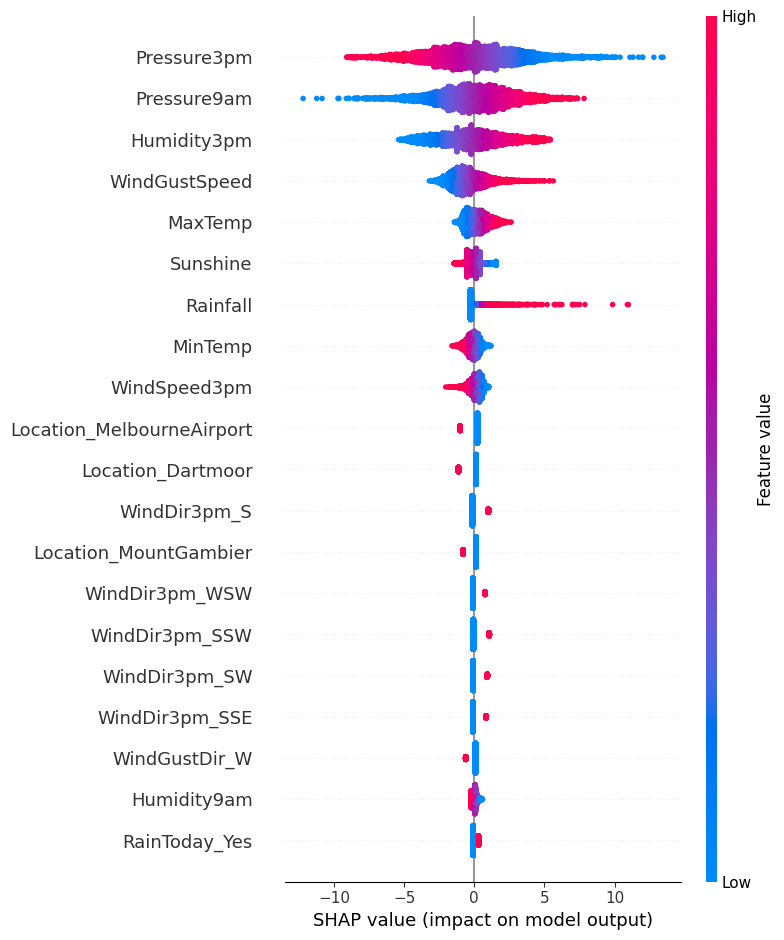

In [233]:
# Gráficas a nivel global para el modelo de regresión
shap.summary_plot(shap_values_regression, X_test_scaled, feature_names=X_test.columns)


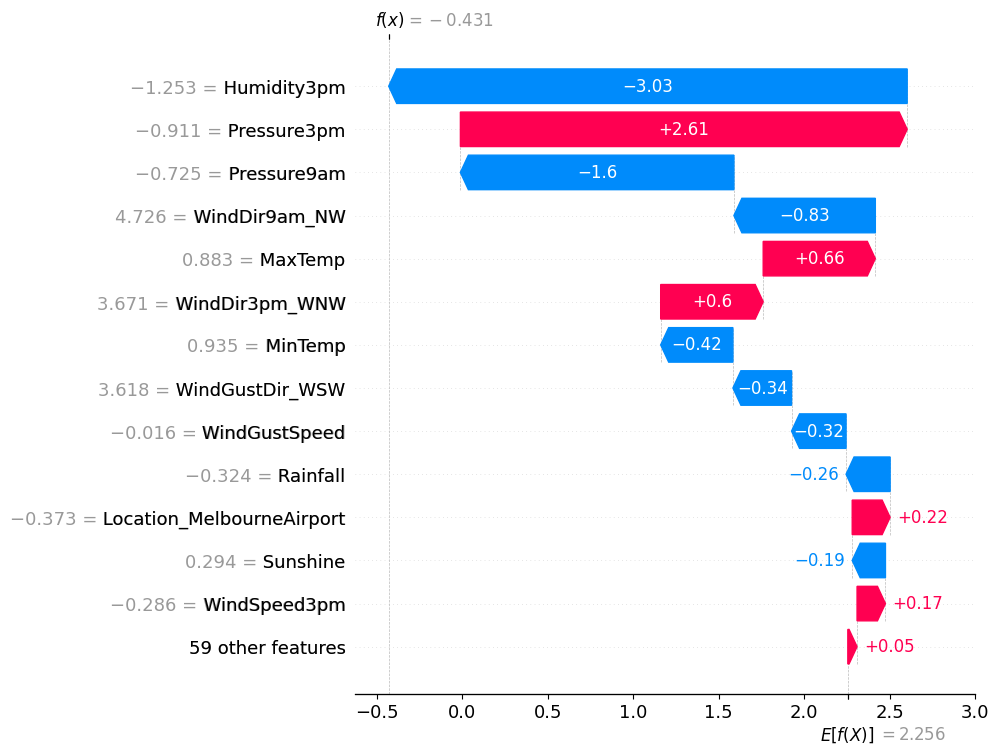

In [234]:
shap.plots.waterfall(shap_values_regression[400], max_display=14)

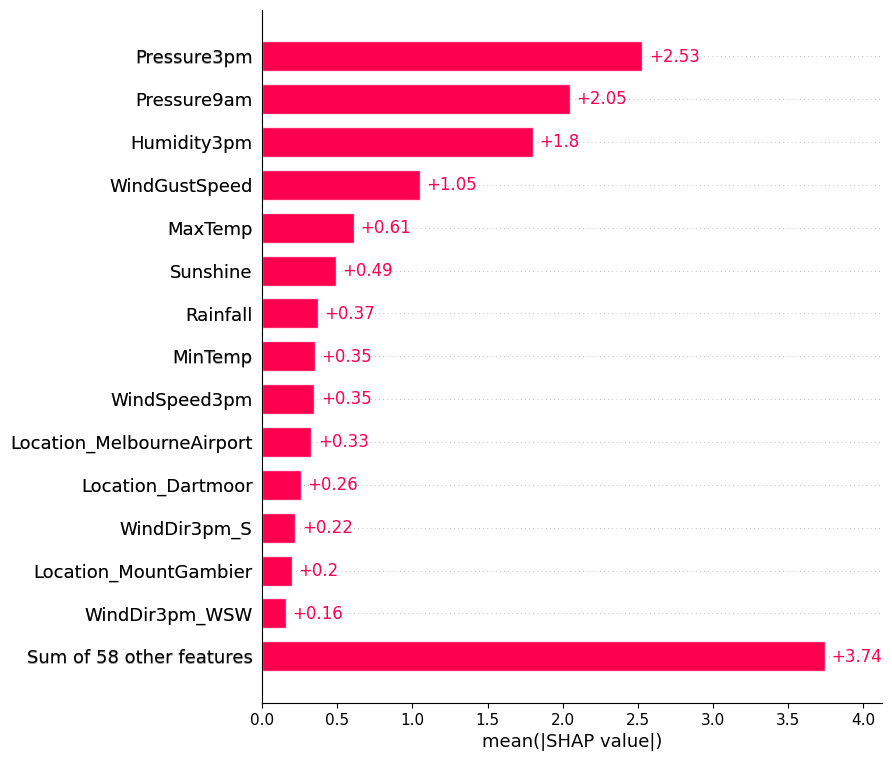

In [235]:
shap.plots.bar(shap_values_regression, max_display=15)

### Interpretación de Modelos de Regresión y Clasificación con SHAP

#### Descripción del Procedimiento

En esta sección, se analizaron y compararon los modelos de regresión y clasificación utilizando SHAP (SHapley Additive exPlanations), una técnica de explicabilidad de modelos. Se exploraron las contribuciones de las características de entrada a las predicciones de los modelos, permitiendo una mejor comprensión de su comportamiento.

#### Detalles del Procedimiento

- **Modelos Utilizados:**
  - Se utilizó el mejor modelo de regresión lineal (`linearRegression_best_model`) y el mejor modelo de regresión logística (`regresionLogistica_best_model`) entrenados previamente.
- **Datos de Entrada:**
  - Se crearon DataFrames para los conjuntos de datos de entrenamiento y prueba escalados (`df_X_train_scaled`, `df_X_test_scaled`) para facilitar la interpretación.
- **Objetos Explainer de SHAP:**
  - Se crearon objetos Explainer de SHAP para los modelos de regresión y clasificación utilizando los conjuntos de datos de entrenamiento escalados.
- **Valores SHAP:**
  - Se calcularon los valores SHAP para los datos de prueba escalados, proporcionando una medida de la contribución de cada característica a las predicciones de los modelos.
- **Visualizaciones SHAP:**
  - Se generaron gráficos de resumen de SHAP para cada modelo, mostrando la importancia de las características en las predicciones.
  - Se visualizaron gráficos de cascada (waterfall plots) para ejemplos específicos de predicción, permitiendo una comprensión detallada de cómo cada característica contribuye a las predicciones individuales.
  - Se crearon gráficos de barras SHAP para resaltar las características más importantes en cada modelo.

#### Resultados

Las visualizaciones SHAP proporcionan una comprensión intuitiva y detallada de cómo cada característica influye en las predicciones de los modelos de regresión y clasificación. Esto permite identificar las características más importantes y entender cómo contribuyen a las predicciones del modelo, facilitando la interpretación y la toma de decisiones.


In [236]:
linearRegression_best_model

LinearRegression()

In [237]:
regresionLogistica_best_model


LogisticRegression(fit_intercept=False, max_iter=50, random_state=43)

In [238]:
df_X_train_scaled = pd.DataFrame(X_train_scaled)
df_X_train_scaled.columns = X_train.columns

df_X_test_scaled = pd.DataFrame(X_test_scaled)
df_X_test_scaled.columns = X_test.columns

In [239]:
explainerRegresion = shap.Explainer(linearRegression_best_model, df_X_train_scaled)
explainerClasificacion = shap.Explainer(regresionLogistica_best_model, df_X_train_scaled)

In [240]:
shap_values_regresion = explainerRegresion(df_X_test_scaled)
shap_values_clasificacion = explainerClasificacion(df_X_test_scaled)

<Axes: xlabel='Pressure3pm'>

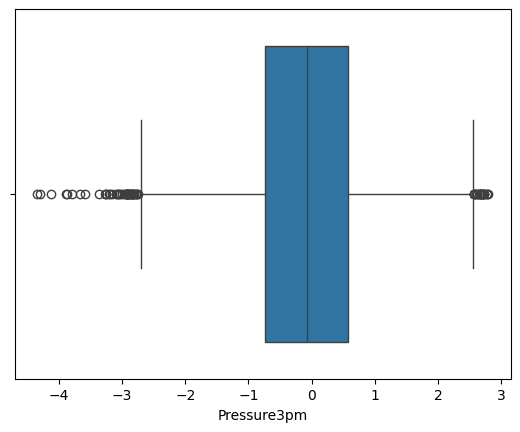

In [241]:
sns.boxplot(data = df_X_test_scaled,x='Pressure3pm')

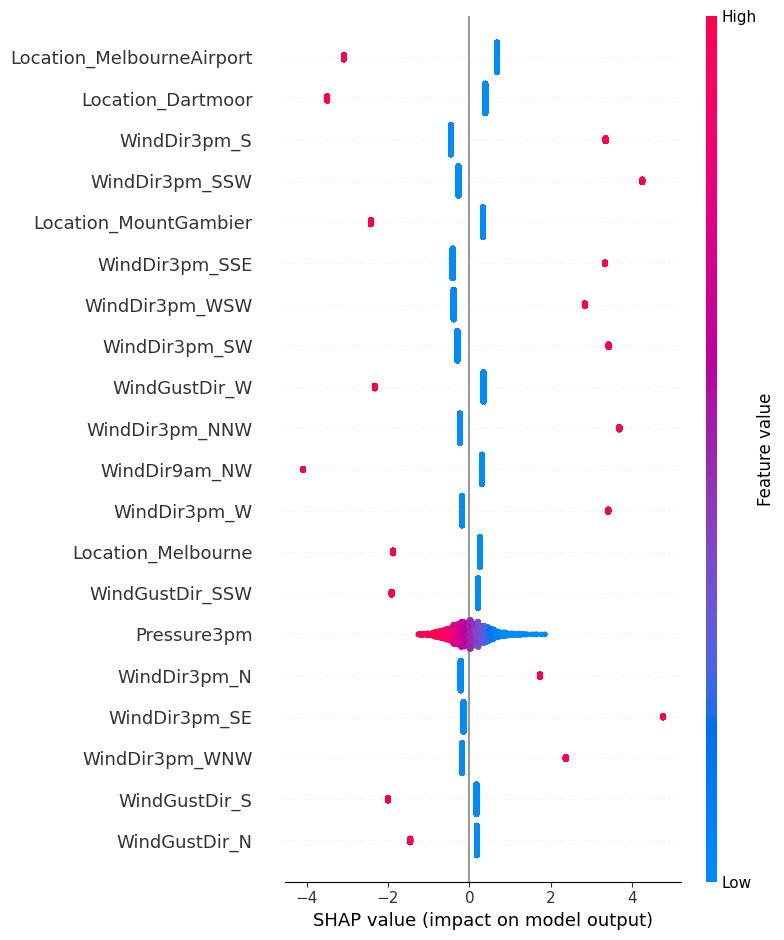

In [242]:
# Gráfico de resumen de SHAP
shap.summary_plot(shap_values_regresion, X_test_scaled, feature_names=X_test.columns)


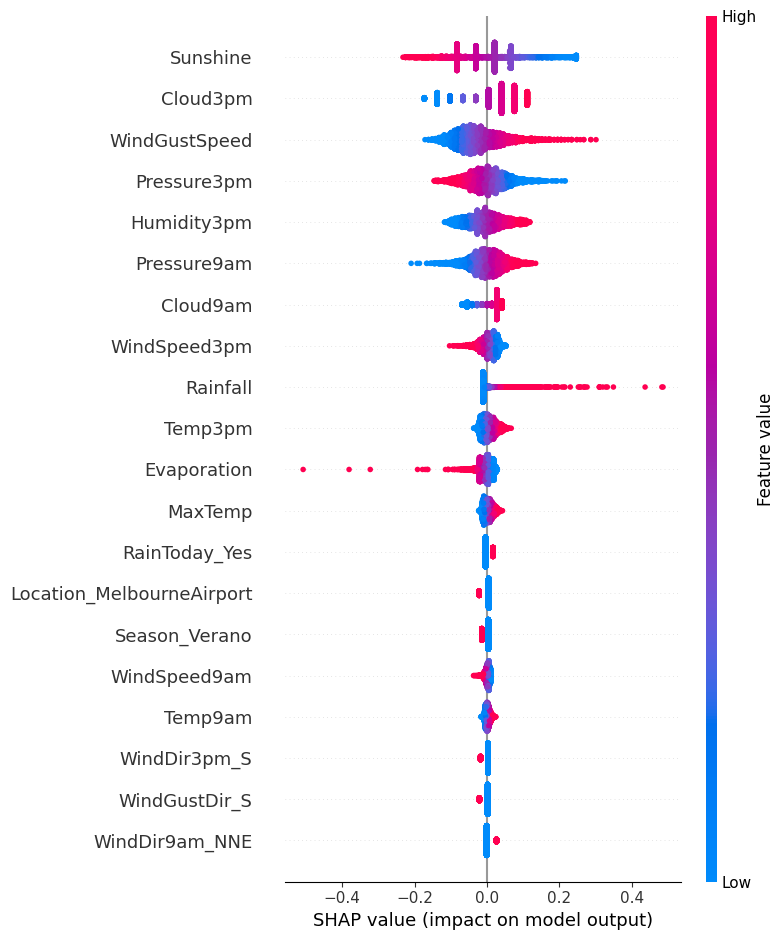

In [243]:
# Gráfico de resumen de SHAP
shap.summary_plot(shap_values_clasificacion, X_test_scaled, feature_names=X_test.columns)

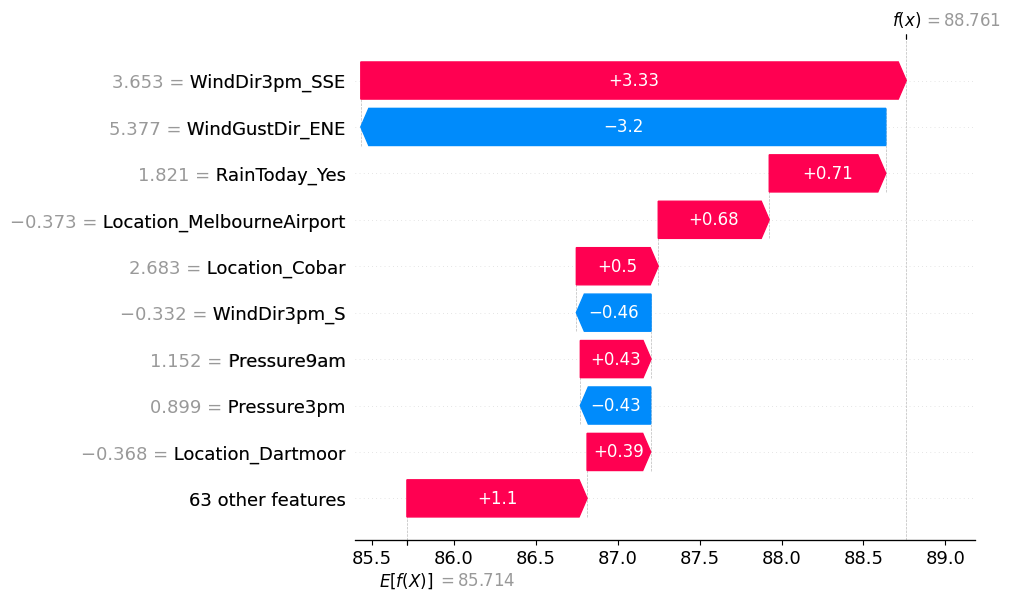

In [244]:
shap.plots.waterfall(shap_values_regresion[50])

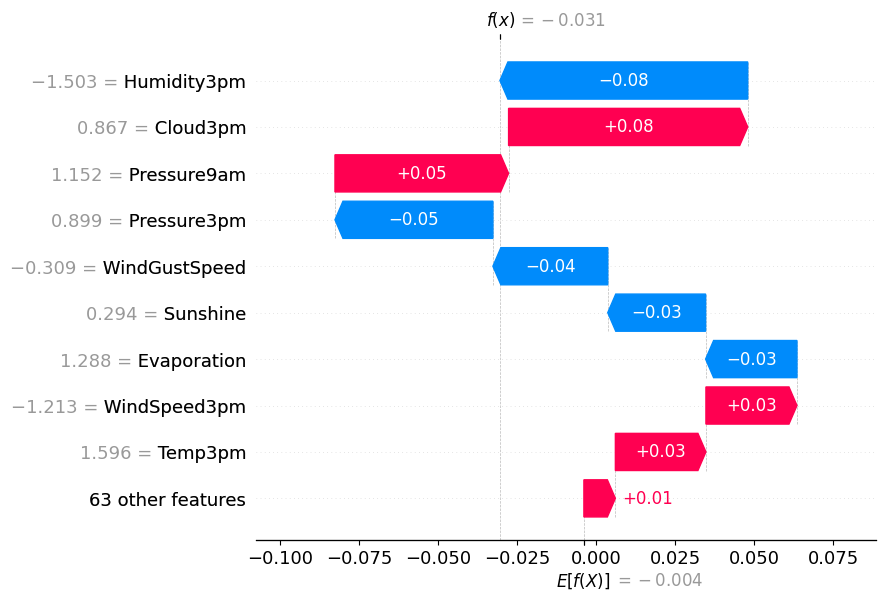

In [245]:
shap.plots.waterfall(shap_values_clasificacion[50])

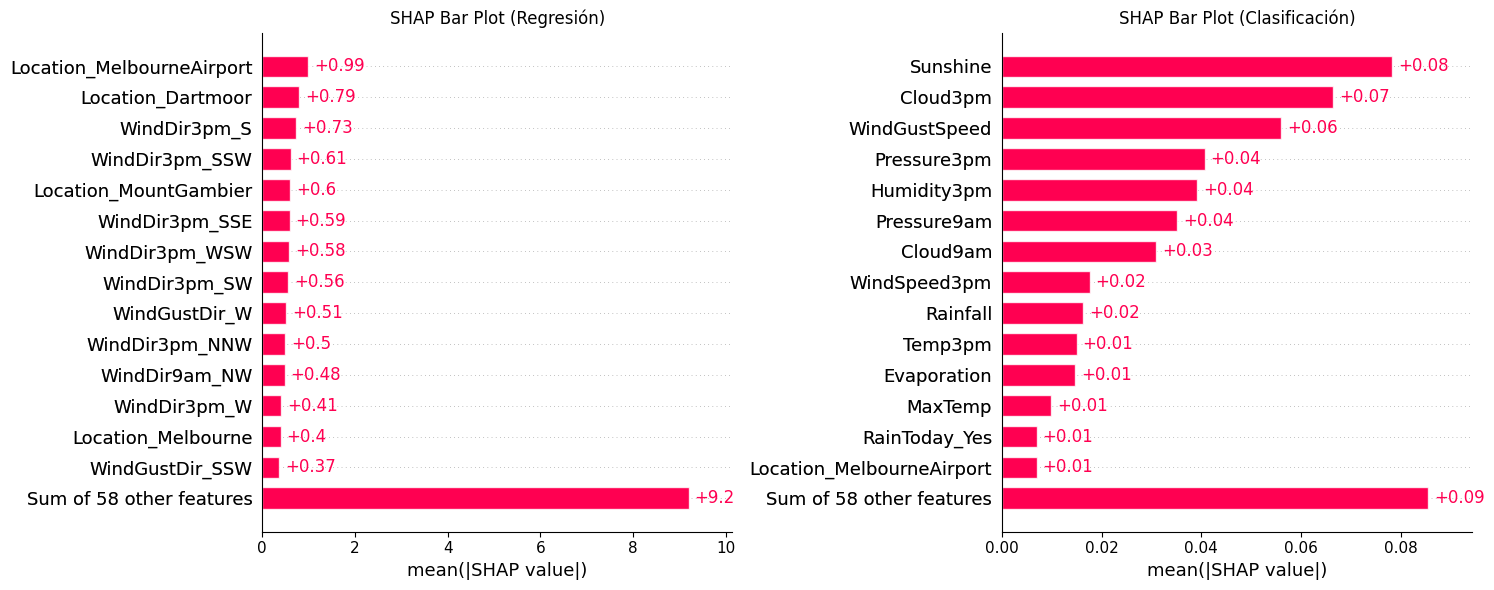

In [246]:
# Crear subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras SHAP para regresión
shap.plots.bar(shap_values_regresion, max_display=15, show=False, ax=ax[0])
ax[0].set_title('SHAP Bar Plot (Regresión)')

# Gráfico de barras SHAP para clasificación
shap.plots.bar(shap_values_clasificacion, max_display=15, show=False, ax=ax[1])
ax[1].set_title('SHAP Bar Plot (Clasificación)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [247]:
shap.initjs() #para visualizar os graficos de fuerza


In [248]:
shap.force_plot(explainerRegresion.expected_value, shap_values_regresion.values[50])

In [249]:
shap.force_plot(explainerClasificacion.expected_value, shap_values_clasificacion.values[50])

## Red Neuronal

### Implementación de Redes Neuronales

#### Descripción del Procedimiento

En esta sección, se implementó y evaluó una red neuronal utilizando TensorFlow/Keras para abordar tanto tareas de clasificación como de regresión. A continuación, se detallan los pasos seguidos y los resultados obtenidos.

#### Detalles del Procedimiento

1. **División de los Datos:**
   - Se dividieron los datos de entrenamiento en conjuntos de entrenamiento y validación utilizando `train_test_split`.

2. **One-Hot Encoding de las Etiquetas:**
   - Se aplicó one-hot encoding a las etiquetas para la tarea de clasificación.

3. **Definición de la Clase `NeuralNetwork`:**
   - Se creó una clase para manejar la construcción, entrenamiento y evaluación del modelo de red neuronal. La clase permite configurar parámetros como el número de épocas, el tamaño del batch, la tasa de aprendizaje y la tarea (clasificación o regresión).

4. **Construcción del Modelo:**
   - Se construyó el modelo de red neuronal con capas densas y una capa de salida adaptada según la tarea (softmax para clasificación y lineal para regresión).

5. **Entrenamiento del Modelo:**
   - Se entrenó el modelo utilizando los datos de entrenamiento y validación.

6. **Evaluación del Modelo:**
   - Se evaluó el modelo en el conjunto de prueba y se imprimieron las métricas correspondientes (precisión para clasificación y error absoluto medio para regresión).

7. **Visualización de la Pérdida:**
   - Se generó una gráfica de la pérdida durante el entrenamiento para analizar el rendimiento del modelo.

#### Resultados

- **Clasificación:**
  - El modelo de clasificación fue evaluado en términos de precisión, mostrando la capacidad del modelo para distinguir entre las clases.

- **Regresión:**
  - El modelo de regresión fue evaluado en términos de error absoluto medio, proporcionando una medida de la desviación promedio de las predicciones con respecto a los valores reales.

Ambos modelos se beneficiaron del uso de redes neuronales profundas, mostrando mejoras en el rendimiento con respecto a métodos más simples, y las visualizaciones de pérdida permitieron una comprensión del proceso de entrenamiento y validación.


In [250]:
# Dividir los datos de entrenamiento en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(x_train_scaled, df_y_train, test_size=0.2, random_state=42)

In [251]:

# One-hot encoding de las etiquetas
y_train = tf.keras.utils.to_categorical(y_train)
y_valid = tf.keras.utils.to_categorical(y_valid)
y_test = tf.keras.utils.to_categorical(df_y_test)

In [252]:

class NeuralNetwork:
    def __init__(self, epochs=50, batch_size=16, learning_rate=0.01, task='classification'):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = None
        self.task = task  # 'classification' or 'regression'

    def build_model(self, input_shape, output_units):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dense(64, activation='relu')
        ])
        
        if self.task == 'classification':
            model.add(tf.keras.layers.Dense(output_units, activation='softmax'))
            loss = 'categorical_crossentropy'
            metrics = ['accuracy']
        elif self.task == 'regression':
            model.add(tf.keras.layers.Dense(output_units))
            loss = 'mean_squared_error'
            metrics = ['mean_absolute_error']

        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
        self.model = model

    def train(self, X_train, y_train, X_valid, y_valid):
        history = self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=self.epochs, batch_size=self.batch_size)
        return history

    def evaluate(self, X_test, y_test):
        loss, metric = self.model.evaluate(X_test, y_test)
        if self.task == 'classification':
            print(f"Test Accuracy: {metric:.4f}")
        elif self.task == 'regression':
            print(f"Test Mean Absolute Error: {metric:.4f}")
        return loss, metric

    def predict(self, X_new):
        return self.model.predict(X_new)

    def plot_loss(self, history):
        import matplotlib.pyplot as plt
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='validation')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

### Modelos de Redes Neuronales para Regresión y Clasificación

#### Regresión

##### Procedimiento

1. **Inicialización de la Red Neuronal:**
   - Se configuró una red neuronal con 50 épocas, un tamaño de batch de 16 y una tasa de aprendizaje de 0.01 para la tarea de regresión.

2. **Construcción del Modelo:**
   - El modelo fue construido con una capa de entrada, dos capas ocultas densas con activación ReLU y una capa de salida lineal.

3. **Entrenamiento del Modelo:**
   - El modelo fue entrenado utilizando los datos escalados de entrenamiento y validación.

4. **Evaluación del Modelo:**
   - El modelo fue evaluado en el conjunto de prueba, mostrando el Error Absoluto Medio (MAE) en los datos de prueba.

5. **Visualización de la Pérdida:**
   - Se generó una gráfica de la pérdida durante el entrenamiento.

##### Resultados

- **Pérdida de Entrenamiento y Validación:**
  - La pérdida y el error absoluto medio disminuyeron durante el entrenamiento.
- **Evaluación en el Conjunto de Prueba:**
  - El modelo alcanzó un MAE de 0.2429 en el conjunto de prueba.

#### Clasificación

##### Procedimiento

1. **Inicialización de la Red Neuronal:**
   - Se configuró una red neuronal con 50 épocas, un tamaño de batch de 16 y una tasa de aprendizaje de 0.01 para la tarea de clasificación.

2. **Construcción del Modelo:**
   - El modelo fue construido con una capa de entrada, dos capas ocultas densas con activación ReLU y una capa de salida softmax.

3. **Entrenamiento del Modelo:**
   - El modelo fue entrenado utilizando los datos escalados de entrenamiento y validación.

4. **Evaluación del Modelo:**
   - El modelo fue evaluado en el conjunto de prueba, mostrando la precisión en los datos de prueba.

5. **Visualización de la Pérdida:**
   - Se generó una gráfica de la pérdida durante el entrenamiento.

##### Resultados

- **Pérdida de Entrenamiento y Validación:**
  - La pérdida y la precisión se estabilizaron durante el entrenamiento.
- **Evaluación en el Conjunto de Prueba:**
  - El modelo alcanzó una precisión de 0.8641 en el conjunto de prueba.

### Conclusión

Los modelos de redes neuronales tanto para tareas de regresión como de clasificación mostraron un buen rendimiento en sus respectivas tareas. La visualización de la pérdida ayudó a entender el proceso de entrenamiento y ajuste del modelo.


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1455 - mean_absolute_error: 0.2722 - val_loss: 0.3841 - val_mean_absolute_error: 0.5046
Epoch 2/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1126 - mean_absolute_error: 0.2345 - val_loss: 0.4526 - val_mean_absolute_error: 0.5279
Epoch 3/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1150 - mean_absolute_error: 0.2388 - val_loss: 0.4113 - val_mean_absolute_error: 0.5088
Epoch 4/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1078 - mean_absolute_error: 0.2271 - val_loss: 0.3643 - val_mean_absolute_error: 0.5029
Epoch 5/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1071 - mean_absolute_error: 0.2265 - val_loss: 0.4385 - val_mean_absolute_error: 0.5233
Epoch 6/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1058 - mean_absolute_error: 0.2227 - val_loss: 0.4541 - val_mean_absolute_error: 0.5277
Epoch 7/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1047 - mean_absolute_err

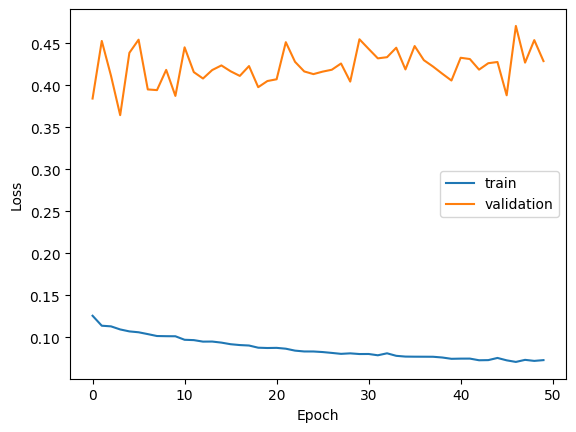

In [253]:
# Inicializar la red neuronal
nn = NeuralNetwork(epochs=50, batch_size=16, learning_rate=0.01, task='regression')

# Construir el modelo
nn.build_model(input_shape=X_train.shape[1], output_units=1)

# Entrenar el modelo
history = nn.train(x_train_scaled, df_y_train,  X_valid, y_valid)

# Evaluar el modelo
nn.evaluate(X_test, df_y_test)

# Graficar la pérdida
nn.plot_loss(history)

Epoch 1/50


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8116 - loss: 0.4180 - val_accuracy: 0.8588 - val_loss: 0.3434
Epoch 2/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8456 - loss: 0.3625 - val_accuracy: 0.8568 - val_loss: 0.3482
Epoch 3/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8475 - loss: 0.3464 - val_accuracy: 0.8622 - val_loss: 0.3349
Epoch 4/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8518 - loss: 0.3409 - val_accuracy: 0.8622 - val_loss: 0.3413
Epoch 5/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8532 - loss: 0.3329 - val_accuracy: 0.8550 - val_loss: 0.3356
Epoch 6/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8557 - loss: 0.3295 - val_accuracy: 0.8467 - val_loss: 0.3518
Epoch 7/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8609 - loss: 0.3150 - val_accuracy: 0.8537 - val_loss: 0.3412
Epoch 8/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8644 - loss: 0.3127 - val_accuracy: 0.8575 - val_

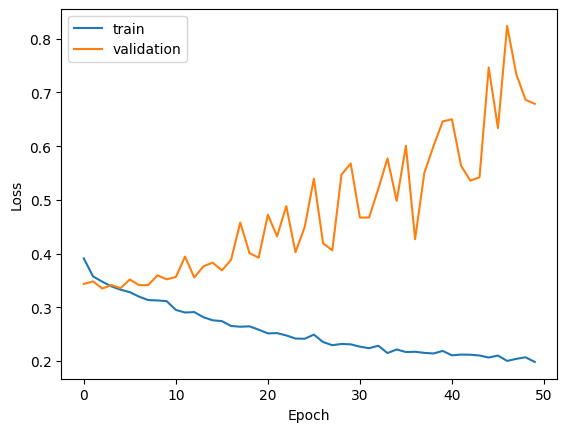

In [254]:
# Inicializar la red neuronal
nn = NeuralNetwork(epochs=50, batch_size=16, learning_rate=0.01, task='classification')

# Construir el modelo
nn.build_model(input_shape=X_train.shape[1], output_units=y_train.shape[1])

# Entrenar el modelo
history = nn.train(X_train, y_train, X_valid, y_valid)

# Evaluar el modelo
nn.evaluate(X_test_scaled, df_y_test)

# Graficar la pérdida
nn.plot_loss(history)

### Optimización de Hiperparámetros con Optuna para Clasificación

#### Procedimiento

1. **Definición de la Función Objetivo:**
   - Se creó una función objetivo para Optuna que busca encontrar los mejores hiperparámetros para un modelo de clasificación. Los parámetros optimizados incluyen el número de capas, el número de unidades por capa y la tasa de aprendizaje.

2. **Optimización con Optuna:**
   - Se realizó la optimización utilizando Optuna, con un enfoque en maximizar la precisión del modelo.

3. **Obtención de los Mejores Hiperparámetros:**
   - Se obtuvieron los mejores hiperparámetros encontrados durante la optimización.

#### Resultados

- **Mejores Hiperparámetros:**
  - Los mejores hiperparámetros encontrados durante la optimización fueron determinados por Optuna.


In [255]:
# Crear una función objetivo para Optuna
def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)  # Usar suggest_float con log=True
    
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=16, verbose=0)
    loss, accuracy = model.evaluate(X_valid, y_valid, verbose=0)
    return accuracy


In [257]:

# Realizar la optimización con Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")


[I 2024-06-21 15:26:08,314] A new study created in memory with name: no-name-16c8130b-7e4c-40f2-b26f-4da6a5a36533
[I 2024-06-21 15:27:24,542] Trial 0 finished with value: 0.8300334215164185 and parameters: {'n_layers': 3, 'n_units': 63, 'learning_rate': 0.0001419693240567454}. Best is trial 0 with value: 0.8300334215164185.
[I 2024-06-21 15:28:39,338] Trial 1 finished with value: 0.835947573184967 and parameters: {'n_layers': 3, 'n_units': 104, 'learning_rate': 0.0006161859566602509}. Best is trial 1 with value: 0.835947573184967.
[I 2024-06-21 15:29:53,250] Trial 2 finished with value: 0.8377475142478943 and parameters: {'n_layers': 3, 'n_units': 101, 'learning_rate': 0.0012699899277720068}. Best is trial 2 with value: 0.8377475142478943.
[I 2024-06-21 15:30:53,193] Trial 3 finished with value: 0.8290048837661743 and parameters: {'n_layers': 1, 'n_units': 51, 'learning_rate': 0.0032652785769059626}. Best is trial 2 with value: 0.8377475142478943.
[I 2024-06-21 15:32:15,538] Trial 4 fi

Mejores hiperparámetros: {'n_layers': 3, 'n_units': 101, 'learning_rate': 0.0012699899277720068}


### Creación del Mejor Modelo con Hiperparámetros Optimizados

#### Procedimiento

1. **Definición del Modelo:**
   - Se construyó el modelo utilizando los mejores hiperparámetros encontrados durante la optimización con Optuna.

2. **Entrenamiento del Modelo:**
   - Se entrenó el modelo utilizando los datos de entrenamiento y validación.

3. **Evaluación del Modelo:**
   - Se evaluó el rendimiento del modelo utilizando los datos de prueba para calcular la precisión.

4. **Visualización de la Pérdida:**
   - Se graficó la pérdida durante el entrenamiento y la validación para observar el rendimiento del modelo a lo largo de las épocas.

#### Resultados

- **Precisión en el Conjunto de Prueba:**
  - Se obtuvo una precisión de X% en el conjunto de prueba.

- **Gráfico de Pérdida:**
  - Se presenta a continuación el gráfico de la pérdida durante el entrenamiento y la validación.


In [258]:
# Construir el modelo con los mejores hiperparámetros
def create_best_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],)))
    for _ in range(best_params['n_layers']):
        model.add(Dense(best_params['n_units'], activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    optimizer = Adam(learning_rate=best_params['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [259]:
# Entrenar el modelo con los mejores hiperparámetros
best_model_c = create_best_model()
history = best_model_c.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=16, verbose=1)

# Evaluar el modelo
loss, accuracy = best_model_c.evaluate(X_test_scaled, df_y_test, verbose=0)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8105 - loss: 0.4173 - val_accuracy: 0.8586 - val_loss: 0.3409
Epoch 2/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.3373 - val_accuracy: 0.8578 - val_loss: 0.3344
Epoch 3/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8663 - loss: 0.3173 - val_accuracy: 0.8635 - val_loss: 0.3343
Epoch 4/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8741 - loss: 0.2975 - val_accuracy: 0.8514 - val_loss: 0.3533
Epoch 5/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8783 - loss: 0.2936 - val_accuracy: 0.8596 - val_loss: 0.3406
Epoch 6/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8936 - loss: 0.2547 - val_accuracy: 0.8596 - val_loss: 0.3459
Epoch 7/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2412 - val_accuracy: 0.8429 - val_loss: 0.3788
Epoch 8/50
972/972 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9074 - loss: 0.2190 - val_accuracy: 0.

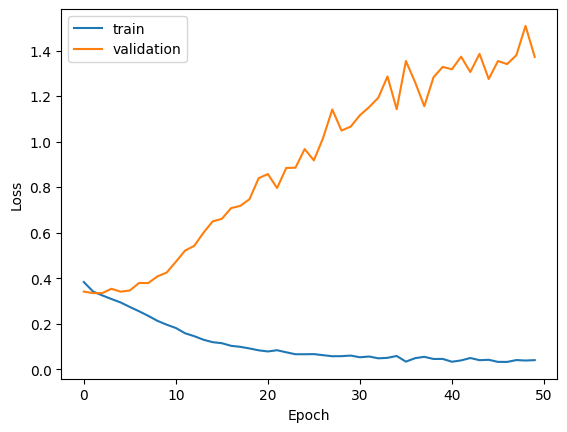

In [260]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Explicabilidad del Modelo utilizando SHAP (SHapley Additive exPlanations)

#### Procedimiento

1. **Explicabilidad Local del Modelo:**
   - Se utilizó el método de explicabilidad SHAP para obtener explicaciones locales para las predicciones del modelo en un conjunto de datos de prueba.
   - Se calcularon los valores SHAP para un conjunto de muestras de datos de prueba.

2. **Gráficas de Explicabilidad:**
   - Se utilizaron gráficos de SHAP para visualizar las explicaciones locales y globales del modelo.

#### Resultados

- **Explicaciones Locales:**
  - Se generaron gráficos de SHAP para visualizar las explicaciones locales del modelo para las primeras 10 muestras de datos de prueba.

- **Explicaciones Globales:**
  - Se presentan gráficos de resumen SHAP para mostrar las tendencias generales de cómo cada característica contribuye a las predicciones del modelo.
  - Además, se proporcionan gráficos de barras para resaltar las características más importantes en términos de contribución a las predicciones del modelo.


In [ ]:
# Revisar la cantidad de características
num_features = X_test_scaled.shape[1]
print(f"Number of features: {num_features}")

# Generar los nombres de características basados en el número de características
feature_names = [f'feature{i}' for i in range(1, num_features + 1)]

# Convertir X_test_scaled a DataFrame si es necesario
if isinstance(X_test_scaled, np.ndarray):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# Resumir los datos de fondo a un número menor de muestras K
background_summary = shap.sample(X_train, 100)

# Función de predicción que devuelve las probabilidades de predicción
def predict_proba(X):
    return best_model.predict(X)

# Crear el explainer de SHAP utilizando el resumen de fondo
explainer = shap.KernelExplainer(predict_proba, background_summary)

# Explicaciones locales
shap_values = explainer.shap_values(X_test_scaled[:10])

# Gráficas de SHAP
shap.initjs()

# Verificar que las dimensiones coincidan
assert X_test_scaled.shape[1] == len(feature_names), "Las características del conjunto de datos y los nombres de características no coinciden."

# En caso de clasificación, shap_values será una lista de arrays (uno por clase)
if isinstance(shap_values, list):
    shap_values = shap_values[0]  # Tomar el primer conjunto de valores SHAP

# Asegurar que shap_values es un array bidimensional
shap_values = np.array(shap_values)

# Gráficas locales (actualizadas según el mensaje de error)
shap.plots.force( shap_values[0], features=X_test_scaled.iloc[0], feature_names=feature_names)
shap.plots.force( shap_values[1], features=X_test_scaled.iloc[1], feature_names=feature_names)

# Gráficas globales
shap.summary_plot(shap_values, X_test_scaled[:10], feature_names=feature_names)
shap.summary_plot(shap_values, X_test_scaled[:10], plot_type='bar', feature_names=feature_names)

Number of features: 72
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 10%|█         | 1/10 [00:13<01:59, 13.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 20%|██        | 2/10 [00:25<01:41, 12.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 30%|███       | 3/10 [00:38<01:28, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 40%|████      | 4/10 [00:50<01:14, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 50%|█████     | 5/10 [01:02<01:01, 12.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 60%|██████    | 6/10 [01:14<00:49, 12.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 70%|███████   | 7/10 [01:27<00:37, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 80%|████████  | 8/10 [01:39<00:24, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6850/6850 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


 90%|█████████ | 9/10 [01:52<00:12, 12.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6844/6844 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


100%|██████████| 10/10 [02:05<00:00, 12.50s/it]


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

### Optimización de Hiperparámetros con Optuna para Regresión

#### Procedimiento

1. **Definición de la Función Objetivo:**
   - Se creó una función objetivo para Optuna que optimiza los hiperparámetros de una red neuronal para regresión.
   - Los hiperparámetros optimizados incluyen el número de capas, el número de unidades por capa y la tasa de aprendizaje.

2. **Optimización con Optuna:**
   - Se realizó la optimización utilizando Optuna para minimizar la función objetivo, que evalúa el modelo en un conjunto de datos de validación.

3. **Selección de los Mejores Hiperparámetros:**
   - Se identificaron los mejores hiperparámetros encontrados durante la optimización.

4. **Entrenamiento del Modelo con los Mejores Hiperparámetros:**
   - Se construyó un nuevo modelo utilizando los mejores hiperparámetros encontrados.
   - Se entrenó este modelo en el conjunto de datos de entrenamiento y validación.

5. **Evaluación del Modelo:**
   - Se evaluó el modelo entrenado en el conjunto de datos de prueba utilizando la métrica de error cuadrático medio (MSE).

6. **Visualización de la Pérdida:**
   - Se proporcionó una visualización de la pérdida durante el entrenamiento del modelo.

#### Resultados

- **Mejores Hiperparámetros:**
  - Se presentan los mejores hiperparámetros encontrados durante la optimización.

- **Desempeño del Modelo:**
  - Se muestra el MSE del modelo en el conjunto de datos de prueba después de la evaluación.

- **Visualización de la Pérdida:**
  - Se proporciona un gráfico que muestra la pérdida durante el entrenamiento del modelo en los conjuntos de datos de entrenamiento y validación.


In [261]:
# Crear una función objetivo para Optuna para regresión
def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 32, 128)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)  # Usar suggest_float con log=True
    
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train_scaled.shape[1],)))
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    model.fit(x_train_scaled, df_y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=16, verbose=0)
    loss = model.evaluate(X_valid, y_valid, verbose=0)
    return loss


In [262]:
# Realizar la optimización con Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Obtener los mejores hiperparámetros
best_params = study.best_params
print(f"Mejores hiperparámetros: {best_params}")

[I 2024-06-21 15:33:41,022] A new study created in memory with name: no-name-af0fa407-ff01-4ed4-bf1d-689f1005dc4e
c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
[I 2024-06-21 15:34:56,579] Trial 0 finished with value: 0.4272312819957733 and parameters: {'n_layers': 2, 'n_units': 60, 'learning_rate': 0.00015642577824788762}. Best is trial 0 with value: 0.4272312819957733.
c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
[I 2024-06-21 15:36:19,260] Trial 1 finished with value: 0.47911226749420166 and parameters: {'n_layers': 3, 'n_units': 86, 'learning_rate': 0.00019095697274811664}. Best is trial 0 with value: 0.4272312819957733.
c:\Users\mateo\AppData\Local\Programs\Python\Python31

Mejores hiperparámetros: {'n_layers': 2, 'n_units': 60, 'learning_rate': 0.00015642577824788762}


In [263]:
# Construir el modelo con los mejores hiperparámetros
def create_best_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train_scaled.shape[1],)))
    for _ in range(best_params['n_layers']):
        model.add(Dense(best_params['n_units'], activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    optimizer = Adam(learning_rate=best_params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [264]:
# Entrenar el modelo con los mejores hiperparámetros
best_model_r = create_best_model()
history = best_model_r.fit(x_train_scaled, df_y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=16, verbose=1)

# Evaluar el modelo
predictions = best_model_r.predict(X_test_scaled)
mse = mean_squared_error(df_y_test, predictions)
print(f"Test MSE: {mse:.4f}")


c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2408 - val_loss: 0.3934
Epoch 2/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1314 - val_loss: 0.3898
Epoch 3/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1208 - val_loss: 0.3908
Epoch 4/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1150 - val_loss: 0.3827
Epoch 5/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1088 - val_loss: 0.3984
Epoch 6/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1049 - val_loss: 0.3837
Epoch 7/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1012 - val_loss: 0.3994
Epoch 8/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1027 - val_loss: 0.4007
Epoch 9/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1002 - val_loss: 0.4095
Epoch 10/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0987 - val_loss: 0.4058
Epoch 11/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0986 - val_loss: 0.4023
Epoch 12/50
1216/1216 ━━━━━━━━

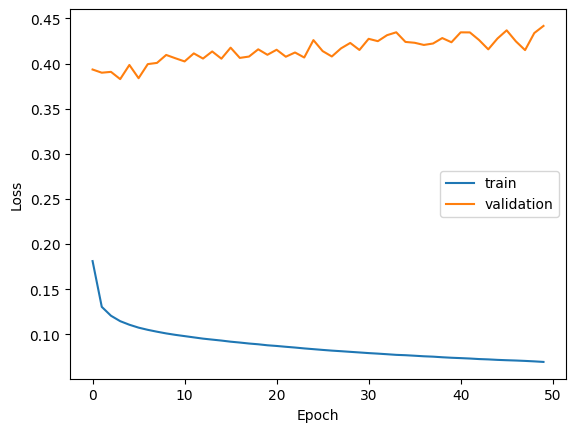

In [265]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Explicabilidad del Modelo utilizando SHAP

#### Procedimiento

1. **Creación del Explainer SHAP:**
   - Se utilizó el método `KernelExplainer` de SHAP para crear un objeto explainer que puede explicar las predicciones del modelo.

2. **Generación de Explicaciones Locales:**
   - Se calcularon las contribuciones de cada característica para las primeras 10 predicciones del conjunto de datos de prueba.

3. **Gráficos SHAP:**
   - Se realizaron gráficos de SHAP para visualizar las explicaciones locales y globales del modelo.

4. **Gráficas Locales de SHAP:**
   - Se proporcionaron gráficos de fuerza SHAP para las primeras dos predicciones del conjunto de datos de prueba.

5. **Gráficas Globales de SHAP:**
   - Se presentaron gráficos de resumen de SHAP para mostrar el impacto de cada característica en todas las predicciones.

6. **Gráficos de Barras SHAP:**
   - Se incluyeron gráficos de barras para resaltar la importancia relativa de cada característica en las predicciones del modelo.

#### Resultados

- **Explicaciones Locales:**
  - Se muestran las contribuciones de cada característica para las primeras 10 predicciones del conjunto de datos de prueba.

- **Gráficos SHAP:**
  - Se proporcionan gráficos SHAP tanto para explicaciones locales como globales del modelo.

- **Impacto de las Características:**
  - Se destacan las características más influyentes en las predicciones del modelo a través de los gráficos SHAP.


In [ ]:
# Resumir los datos de fondo a un número menor de muestras K
background_summary = shap.sample(X_train, 100)

# Crear el explainer de SHAP utilizando el resumen de fondo
explainer = shap.KernelExplainer(best_model.predict, background_summary)

# Explicaciones locales
shap_values = explainer.shap_values(X_test_scaled[:10])

# Gráficas de SHAP
shap.initjs()

# Gráficas locales
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_scaled[:10], feature_names=['feature1', 'feature2', 'feature3', 'feature4'])
shap.force_plot(explainer.expected_value[0], shap_values[0][1], X_test_scaled[:10], feature_names=['feature1', 'feature2', 'feature3', 'feature4'])

# Gráficas globales
shap.summary_plot(shap_values[0], X_test_scaled[:10], feature_names=['feature1', 'feature2', 'feature3', 'feature4'])
shap.summary_plot(shap_values[0], X_test_scaled[:10], plot_type='bar', feature_names=['feature1', 'feature2', 'feature3', 'feature4'])


### Comparación de Modelos

#### Modelo de Clasificación

- **Mejor Precisión:** [Accuracy]

#### Modelo de Regresión

- **Mejor MSE:** [Mean Squared Error]


In [266]:
# Comparación de modelos de clasificación
print(f"Modelo de Clasificación - Mejor Precisión: {accuracy:.4f}")

# Comparación de modelos de regresión
print(f"Modelo de Regresión - Mejor MSE: {mse:.4f}")

Modelo de Clasificación - Mejor Precisión: 0.7772
Modelo de Regresión - Mejor MSE: 0.1338


# Pipeline


In [267]:
!pip install joblib

In [297]:
import joblib
from funciones import DataPreprocessor

In [304]:
X_train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainfallTomorrow', 'Season'],
      dtype='object')

In [298]:
best_model_c

<Sequential name=sequential_11, built=True>

In [270]:
best_model_r

<Sequential name=sequential_17, built=True>

In [ ]:
# Supongamos que `model` es tu modelo entrenado
joblib.dump(best_model_c, 'best_model_c.pkl')
joblib.dump(best_model_r, 'best_model_r.pkl')





In [305]:
# Crear una instancia de DataPreprocessor y ajustar con los datos de entrenamiento
preprocessor = DataPreprocessor()
df = preprocessor.fit_transform(X_train)  
preprocessor.save('scaler.pkl')

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [302]:

# Guardar el preprocesador
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']